# S&P symbols

In [1]:
import sys
!{sys.executable} -m pip install pandas_datareader yfinance matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [2]:
import pandas as pd
from pandas import DataFrame
import json
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

yf.pdr_override()
# no need for requests or BeautifulSoup use read_html
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
# convert symbol column to list
tickers = df['Symbol'].values.tolist()
def get_company_name(s):
    infos = df.loc[df['Symbol'] == s] 
    return infos.iloc[0]["Security"]


In [3]:
# list comprehension to replace data in strings

ma_count = 21

data = pdr.get_data_yahoo(tickers, start=dt.datetime(2021,1,1), end=dt.date.today())['Close']
data.tail()

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


A    AAL         AAP        AAPL        ABBV         ABC  \
Date                                                                            
2022-07-05  120.559998  13.88  182.309998  141.559998  153.929993  140.710007   
2022-07-06  121.180000  13.89  181.770004  142.919998  152.529999  139.839996   
2022-07-07  123.150002  14.10  183.990005  146.350006  152.000000  140.789993   
2022-07-08  122.510002  13.97  182.899994  147.039993  152.850006  142.550003   
2022-07-11  123.120003  13.43  181.750000  144.869995  153.229996  141.320007   

                  ABMD         ABT         ACN        ADBE  ...       WYNN  \
Date                                                        ...              
2022-07-05  256.660004  109.300003  275.170013  376.489990  ...  57.790001   
2022-07-06  253.330002  108.690002  275.940002  382.829987  ...  55.840000   
2022-07-07  267.320007  109.489998  279.399994  390.890015  ...  57.860001   
2022-07-08  267.000000  109.260002  279.070007  389.440002  ...  56.459999   
2022-07-11  262.070007  108.889999  274.869995  384.160004  ...  52.810001   

                  XEL        XOM       XRAY        XYL         YUM  \
Date                                                                 
2022-07-05  69.889999  84.809998  36.099998  78.800003  117.330002   
2022-07-06  71.010002  83.279999  35.619999  79.510002  116.830002   
2022-07-07  69.580002  85.940002  35.459999  80.330002  117.739998   
2022-07-08  69.599998  86.080002  35.209999  78.760002  117.279999   
2022-07-11  69.889999  85.639999  34.759998  78.190002  116.540001   

                   ZBH        ZBRA       ZION         ZTS  
Date                                                       
2022-07-05  106.889999  302.329987  51.080002  174.250000  
2022-07-06  105.730003  294.529999  50.410000  178.500000  
2022-07-07  106.059998  305.140015  51.480000  179.100006  
2022-07-08  105.339996  299.519989  51.040001  177.979996  
2022-07-11  103.300003  291.700012  50.410000  177.039993  

[5 rows x 503 columns]

In [4]:
ma = data.rolling(window=ma_count).mean()
ma_pers = data.div(ma).mul(100).sub(100)
#ma_pers.iloc[[-1]]
ma_pers_r=ma_pers.iloc[::-1]
d = {}
df_prep = []
for col_name in ma_pers_r.columns:
    d[col_name]=0
    ma_last = None
    for index, row in ma_pers_r.iterrows():
        if row[col_name] > 0:
            d[col_name] += 1
            if ma_last == None:
                ma_last=row[col_name]
        else:
            if d[col_name] != 0:
               company = get_company_name(col_name)
               df_prep.append([col_name, company, d[col_name], ma_last, ma_count, "daily"]) 
            break
df = DataFrame(df_prep,columns=['ticker', 'name', 'count', 'ma_diff', 'ma_size', 'ma_type']).sort_values(by=['ma_diff', 'count'], ascending=False)
print(df['count'][df['count'] >= 10].size)
lead_comps_df = df[df['count'] >= 10]
lead_comps = lead_comps_df['ticker'].values.tolist()
lead_comps_df

70


ticker                               name  count    ma_diff  ma_size  \
165   MRNA                            Moderna     13  22.959476       21   
126   INCY                             Incyte     13   8.391242       21   
208    ROL                      Rollins, Inc.     11   7.622855       21   
50      CI                              Cigna     12   7.354703       21   
42    CBOE                Cboe Global Markets     12   7.099513       21   
..     ...                                ...    ...        ...      ...   
28    ATVI                Activision Blizzard     11   1.203723       21   
202     RE                         Everest Re     11   1.034569       21   
231      T                               AT&T     12   0.916449       21   
52      CL                  Colgate-Palmolive     13   0.850641       21   
154    MAA  Mid-America Apartment Communities     11   0.440843       21   

    ma_type  
165   daily  
126   daily  
208   daily  
50    daily  
42    daily  
..      ...  
28    daily  
202   daily  
231   daily  
52    daily  
154   daily  

[70 rows x 6 columns]

/var/folders/f4/vmtnglg97fq8m10syl7h_b1c0000gn/T/ipykernel_34975/1419670689.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20, 10))


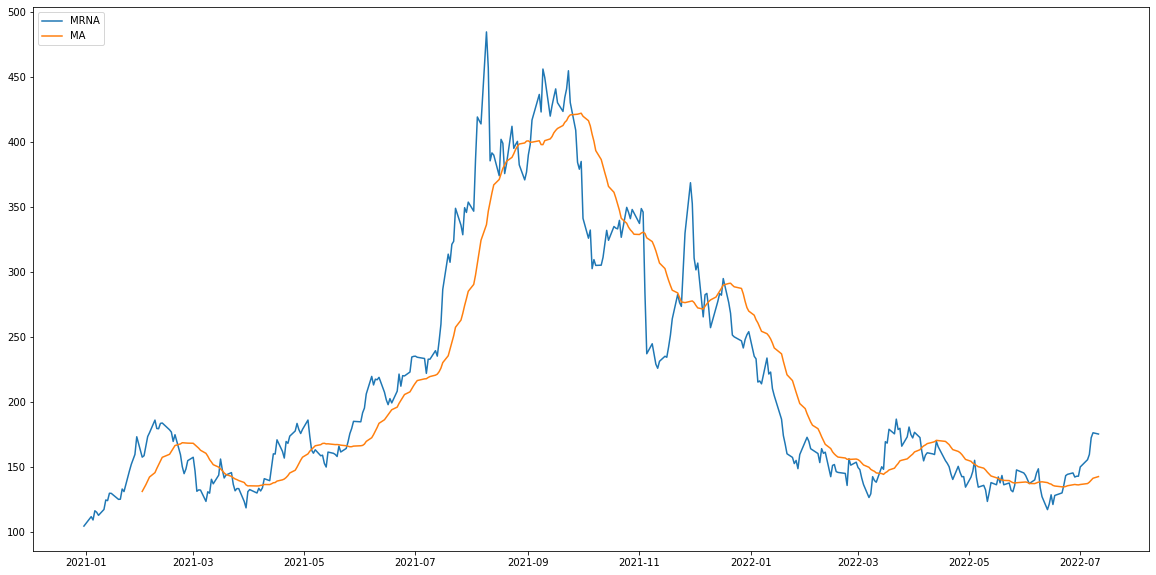

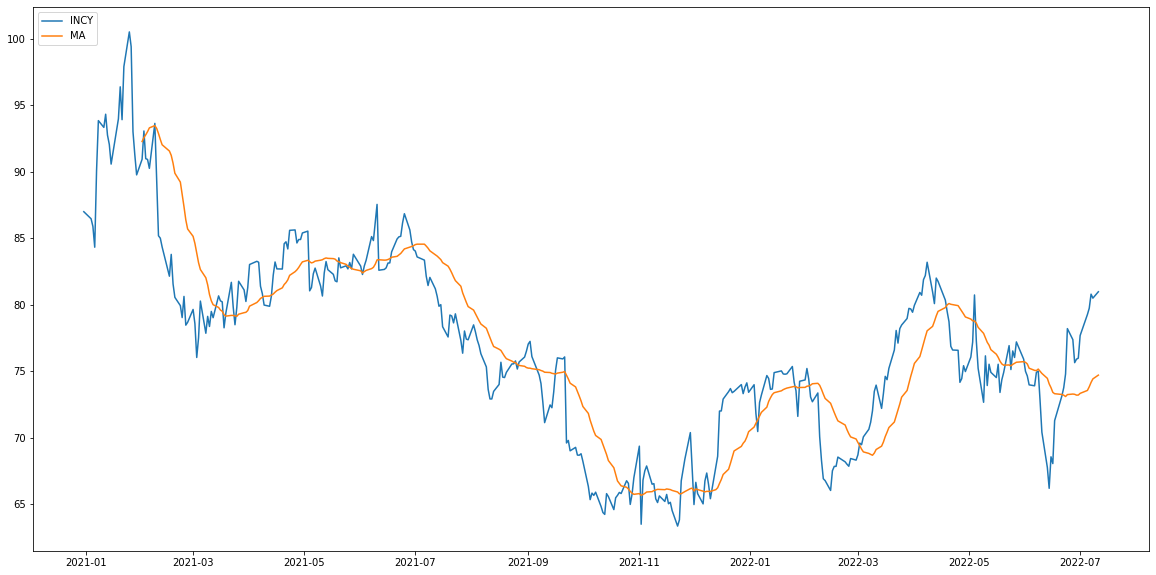

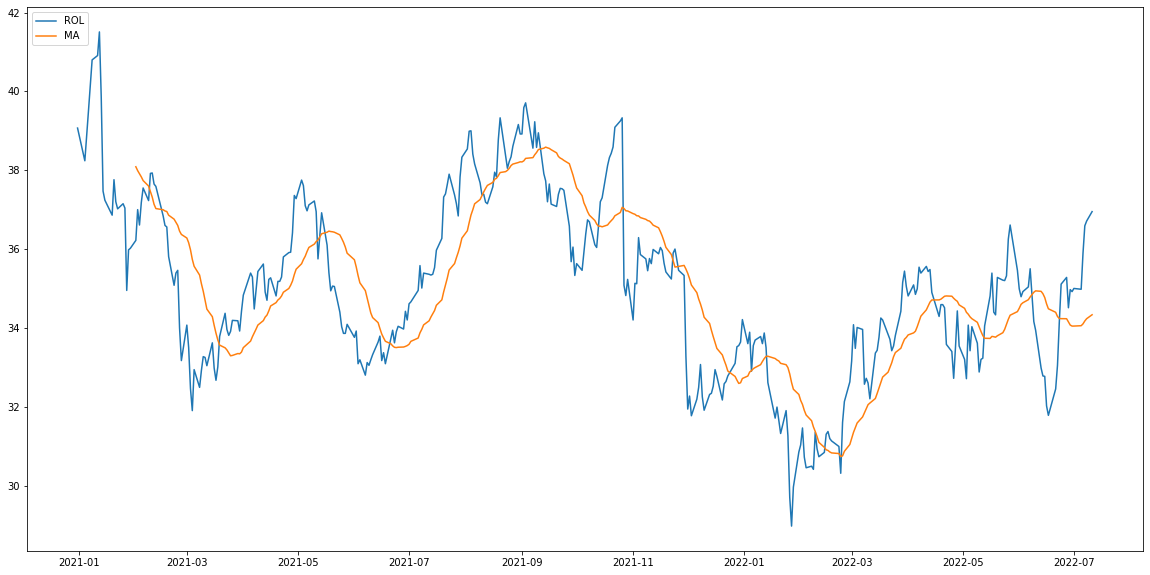

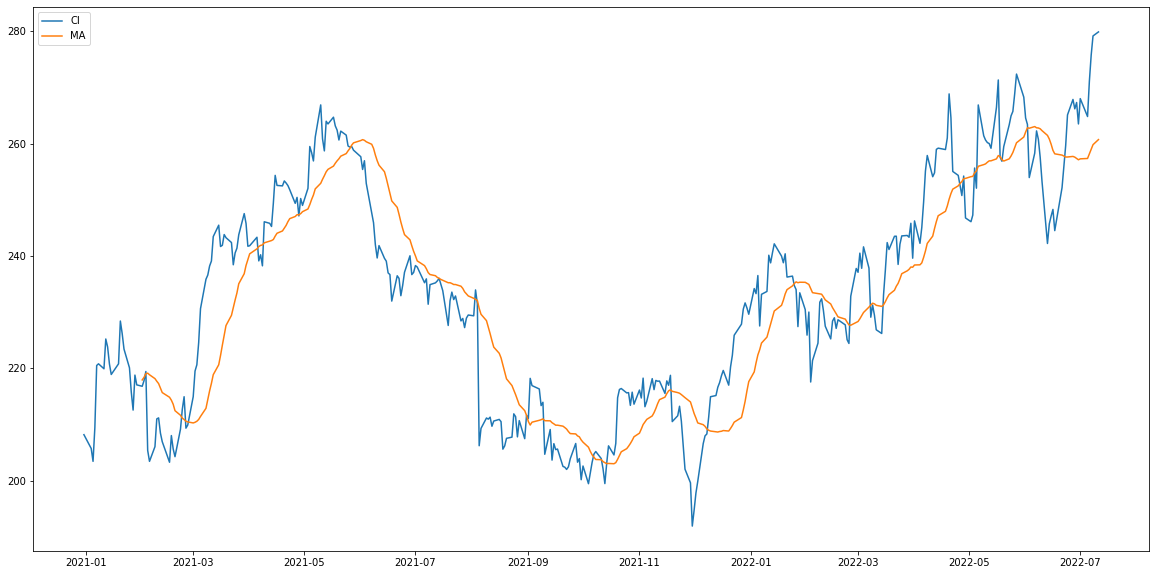

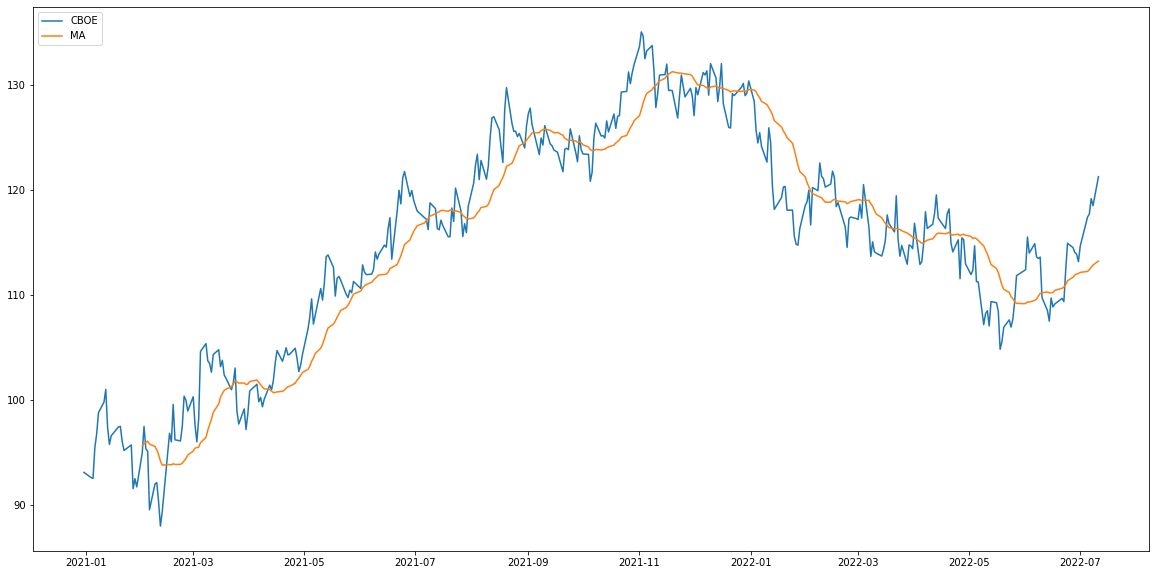

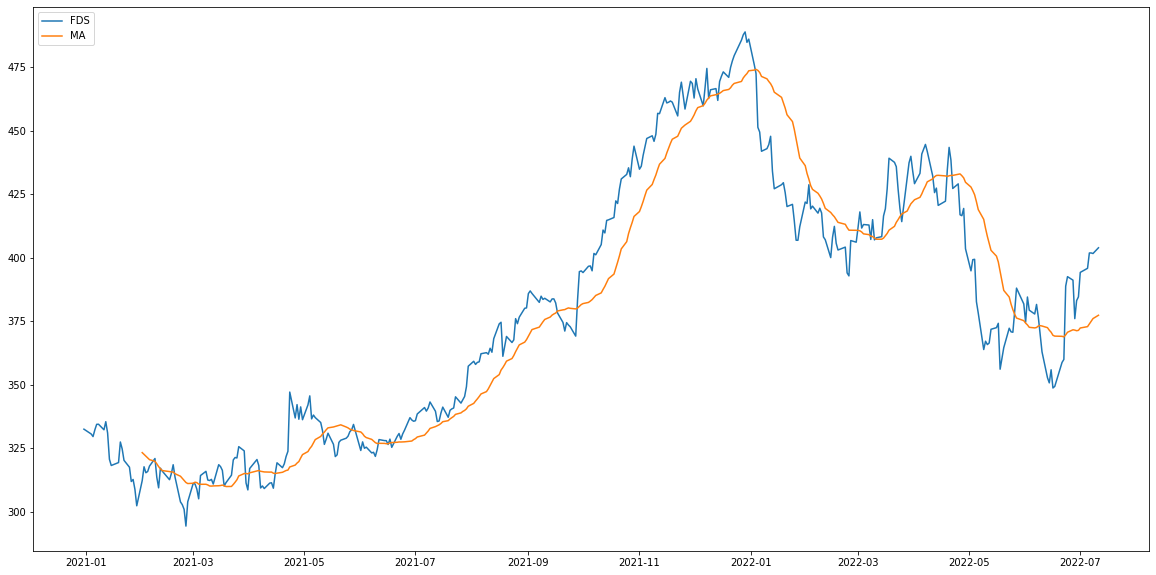

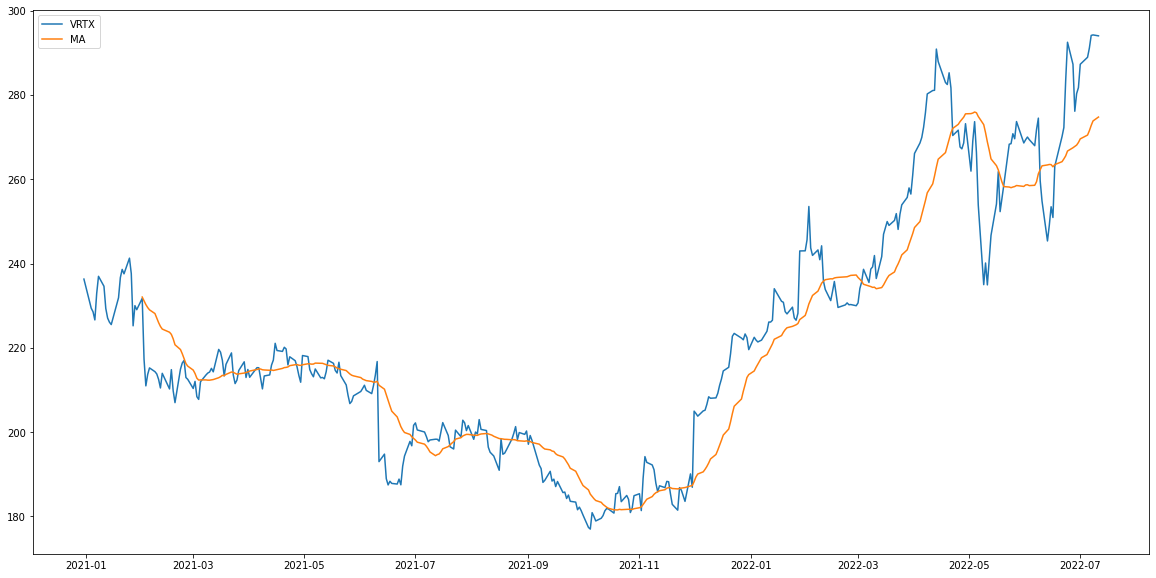

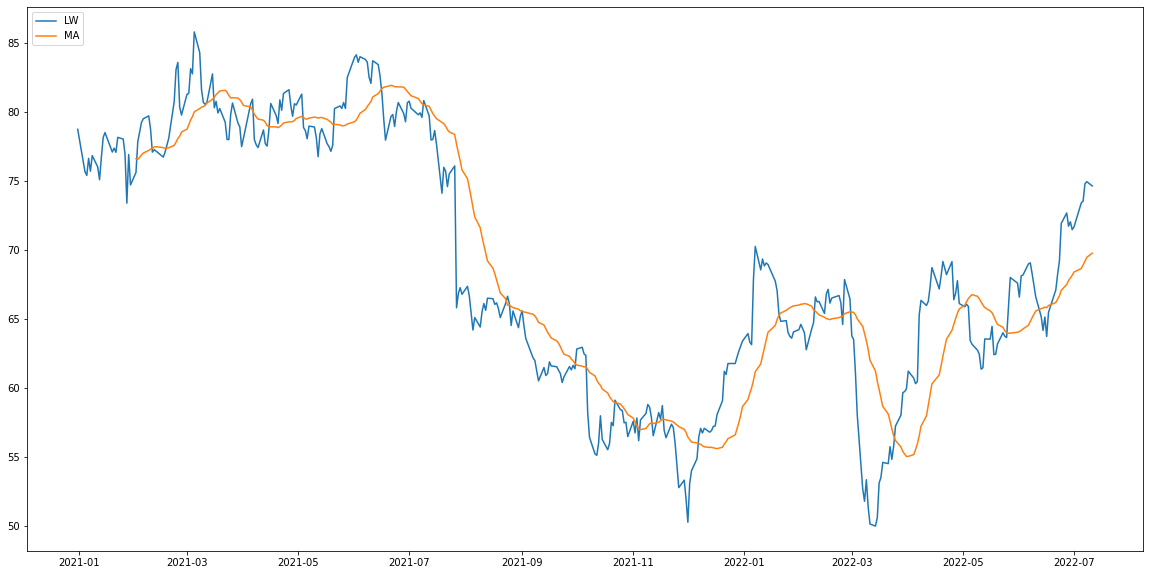

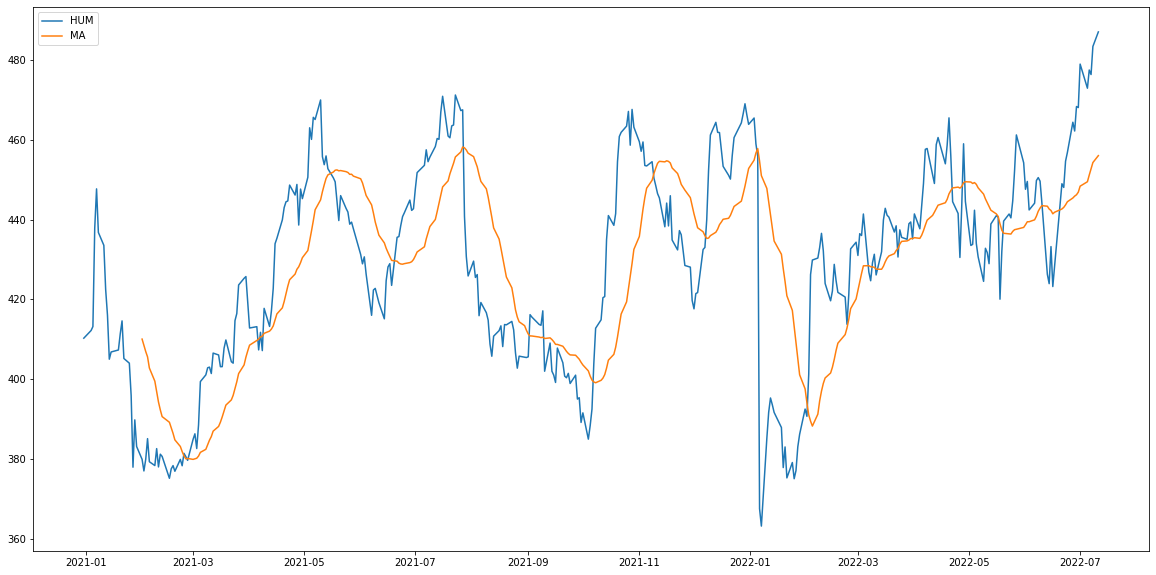

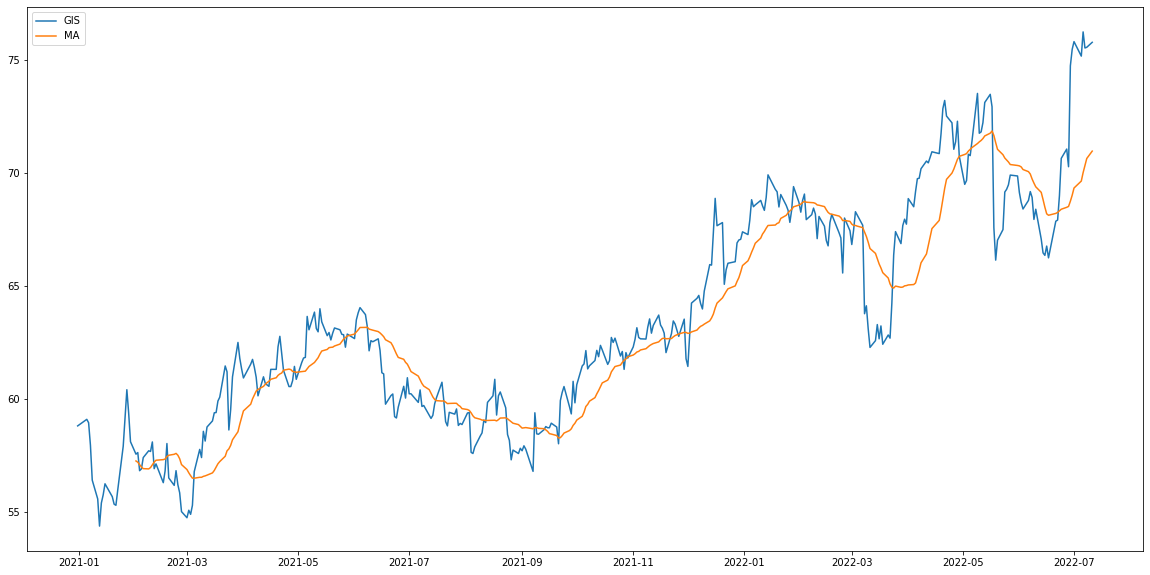

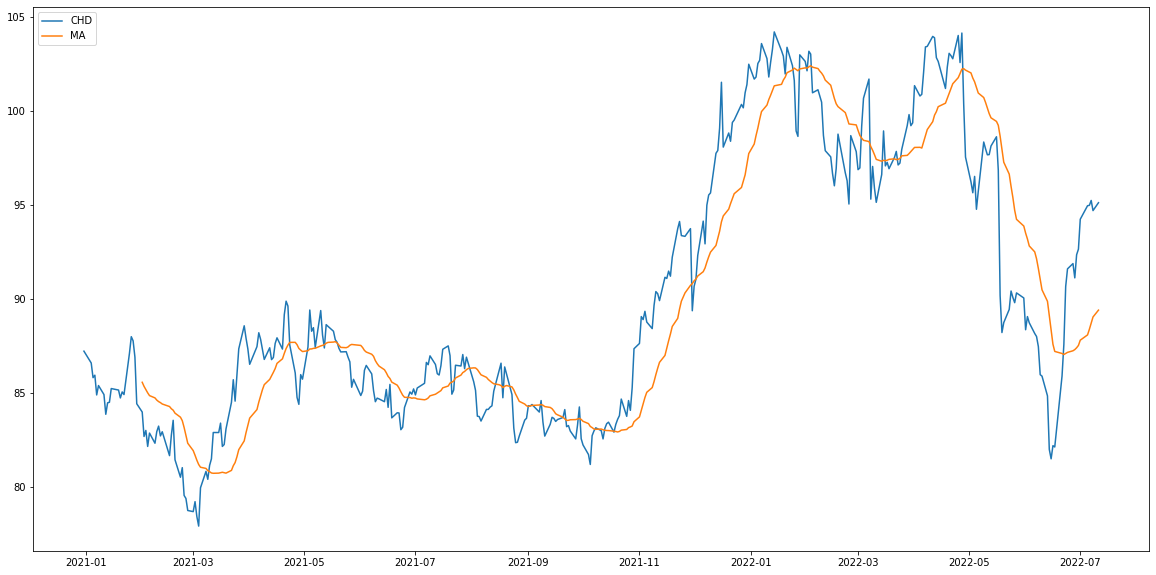

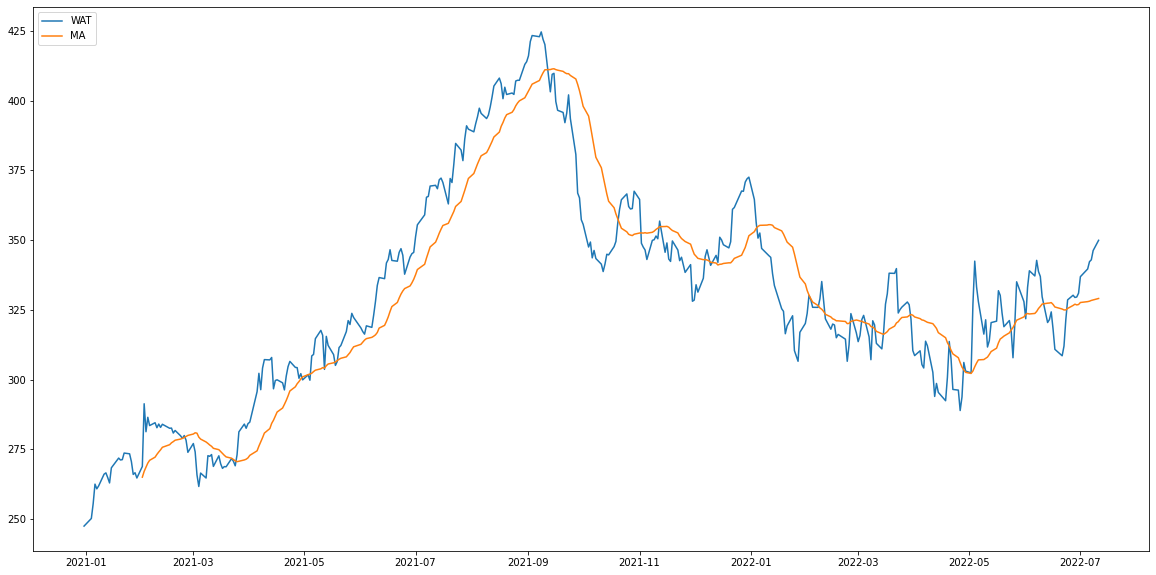

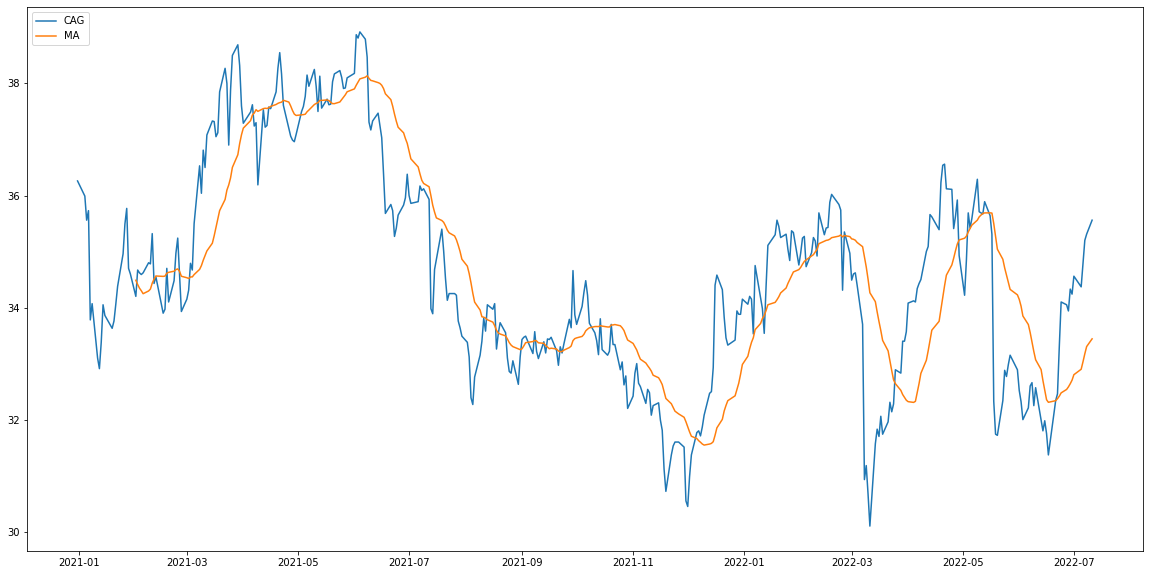

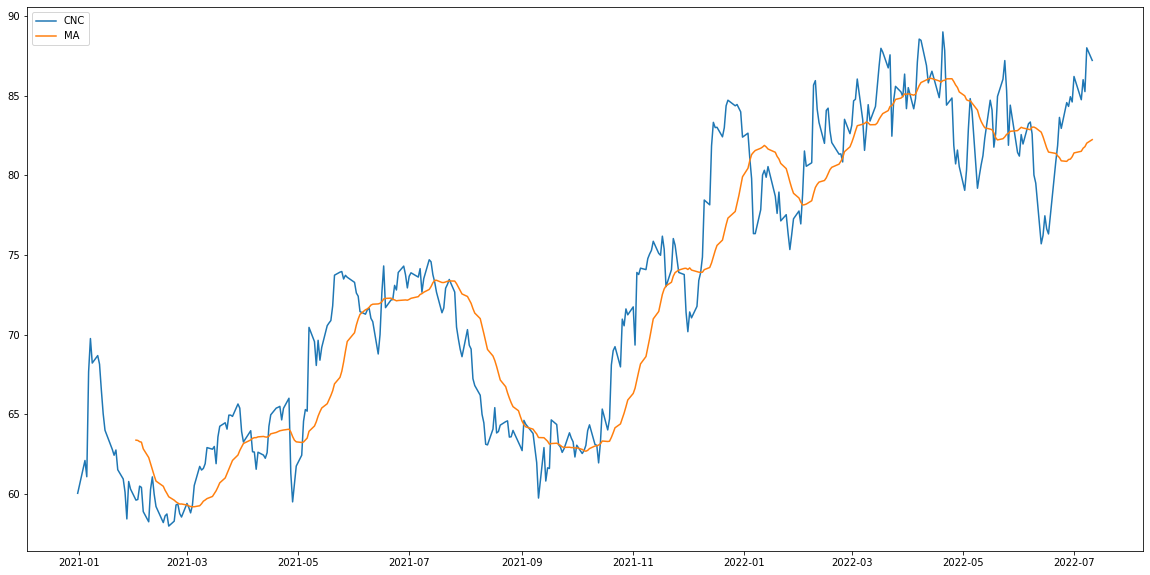

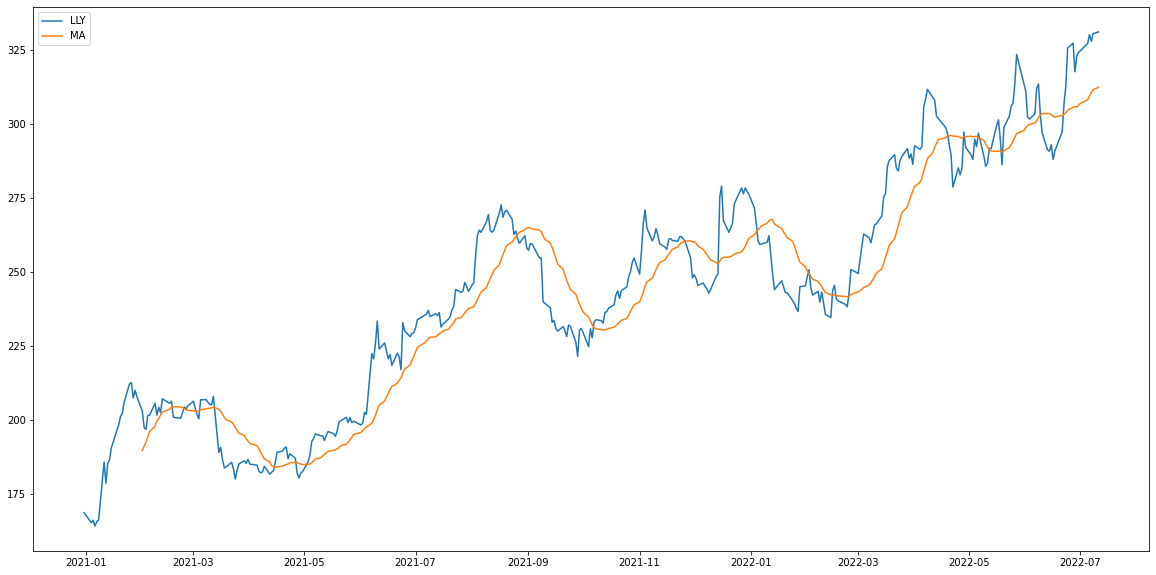

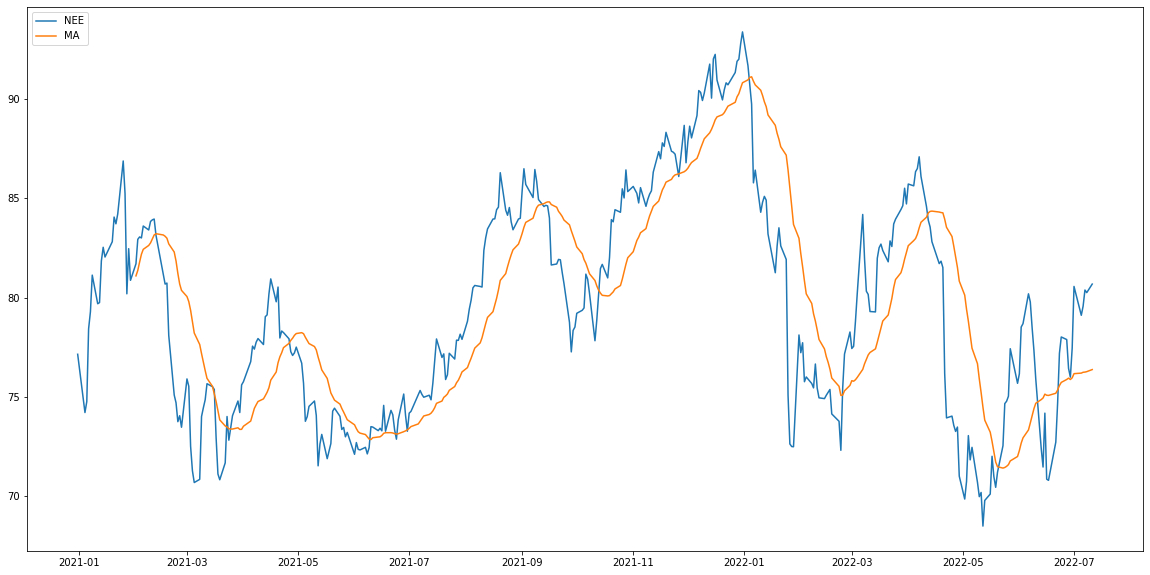

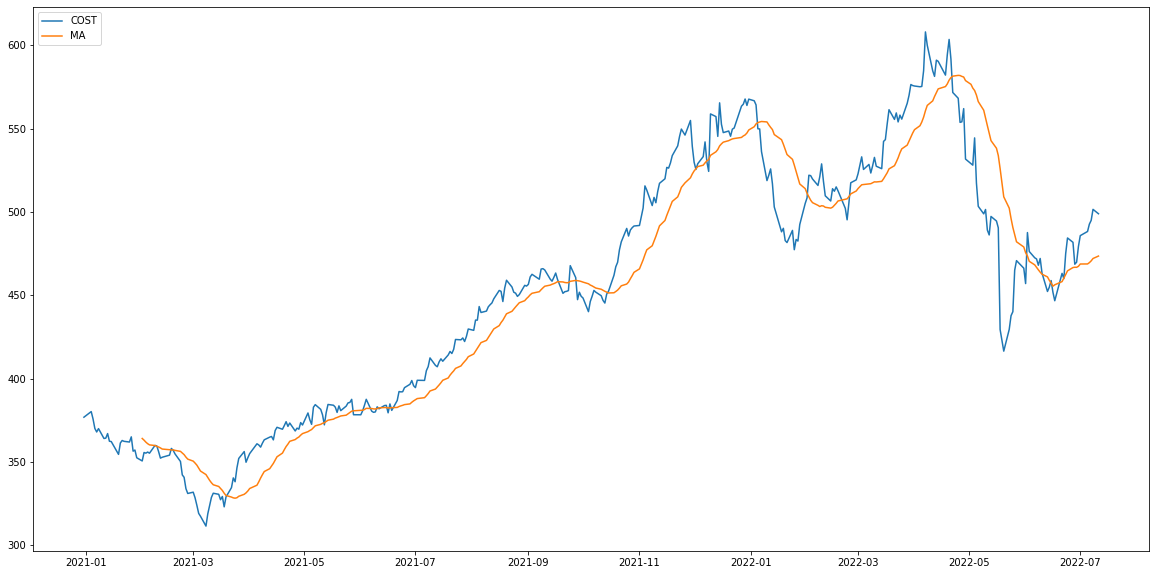

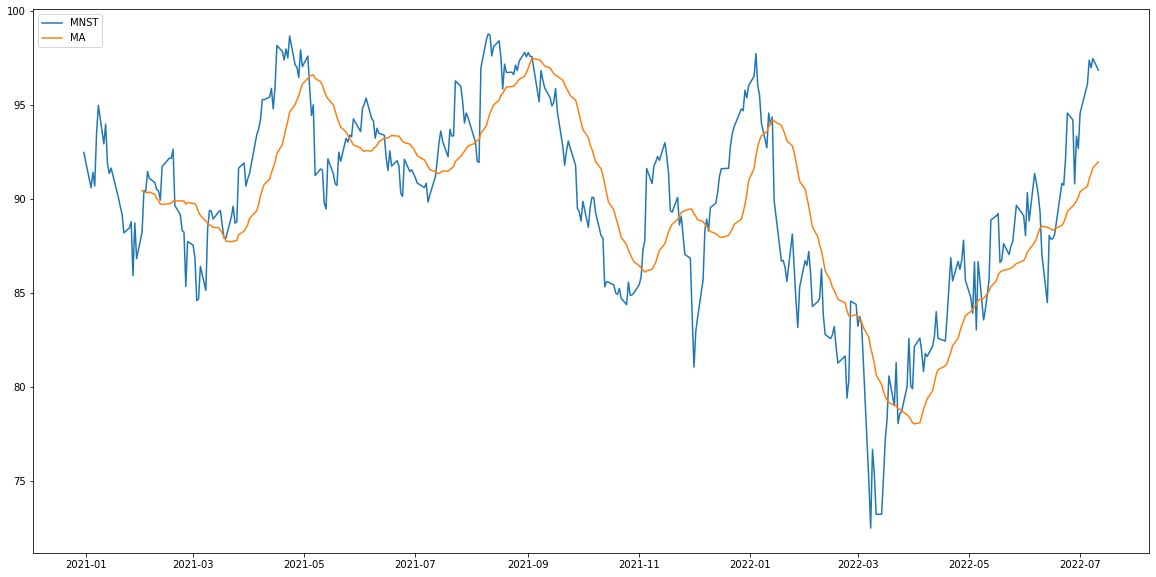

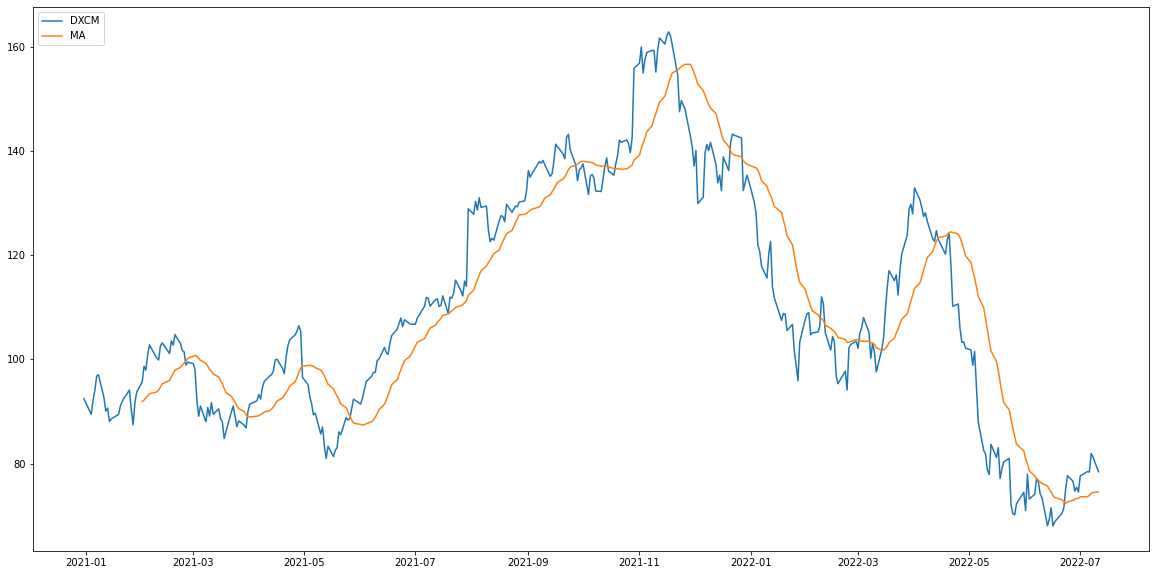

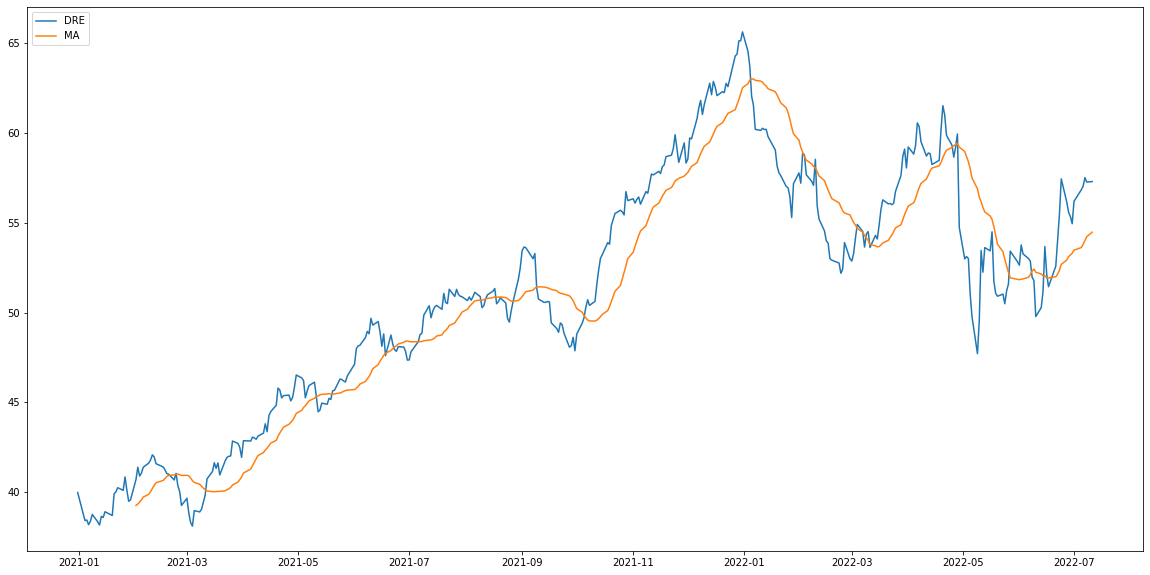

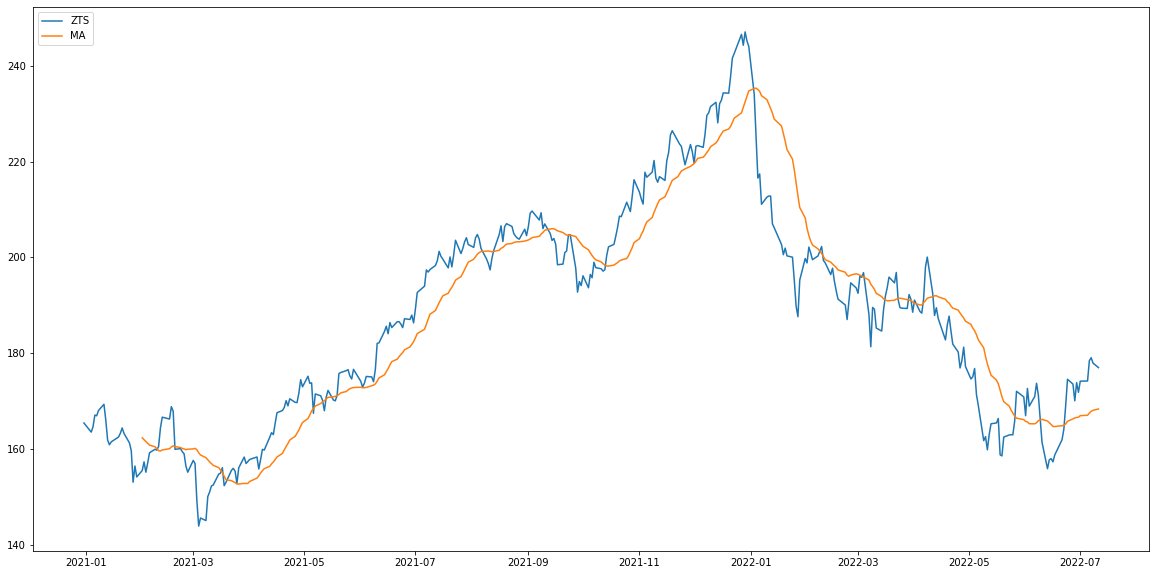

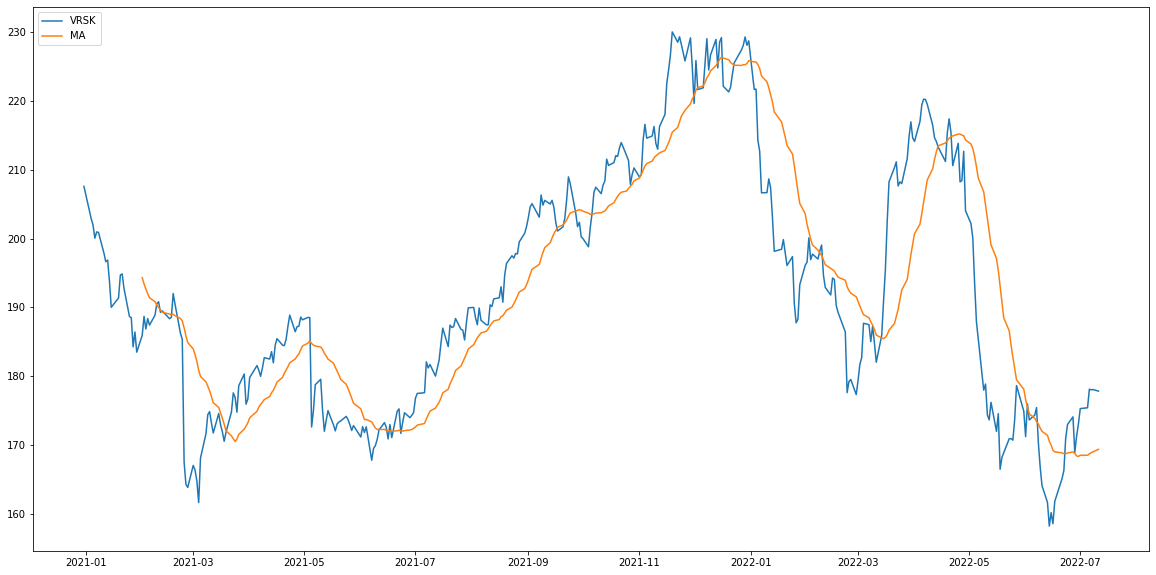

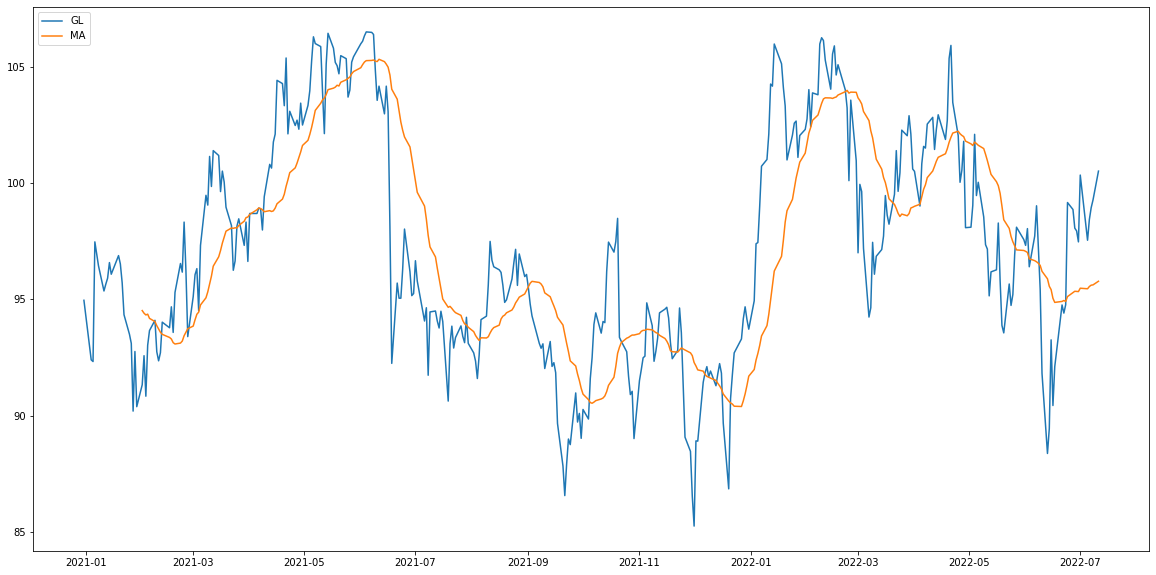

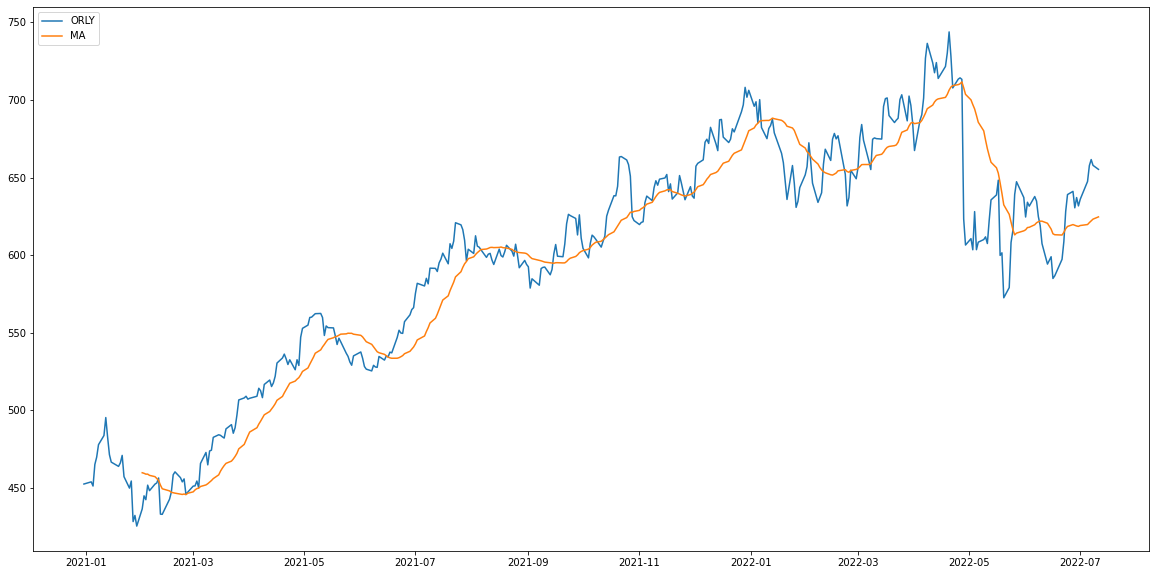

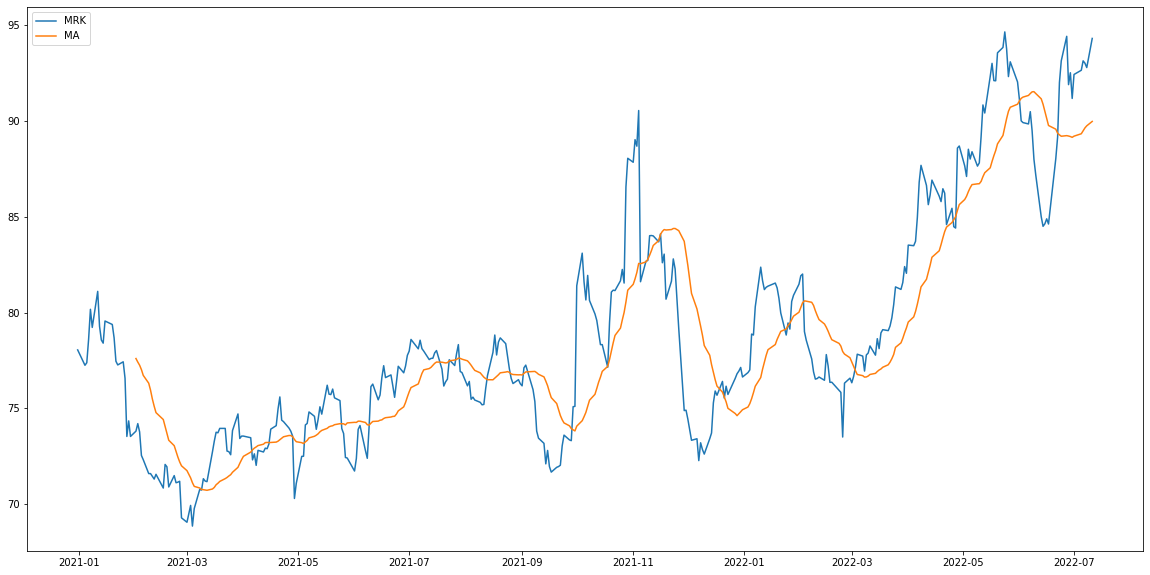

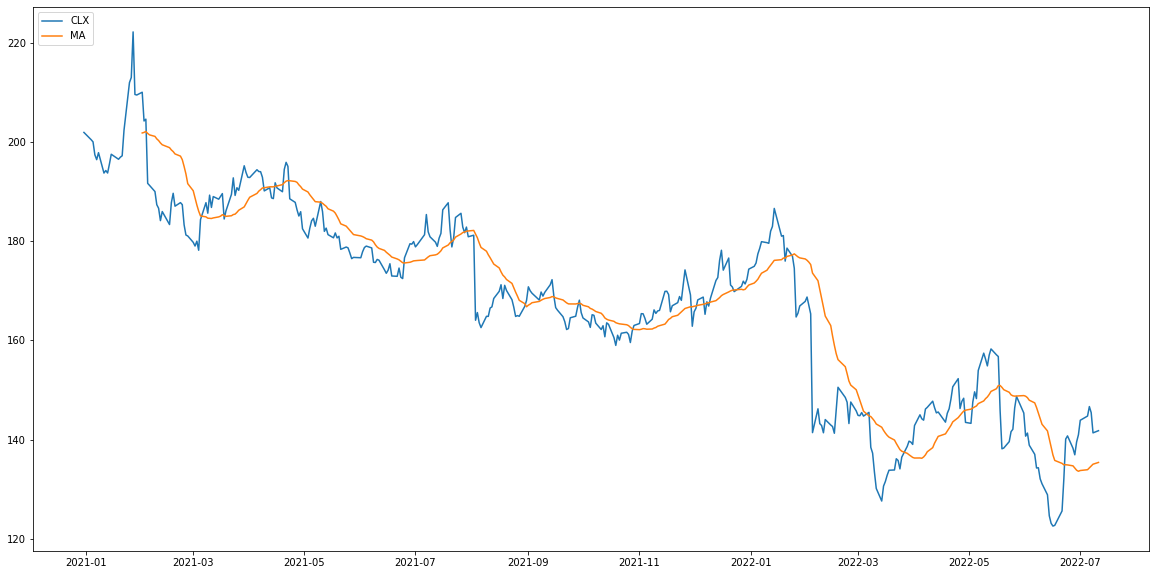

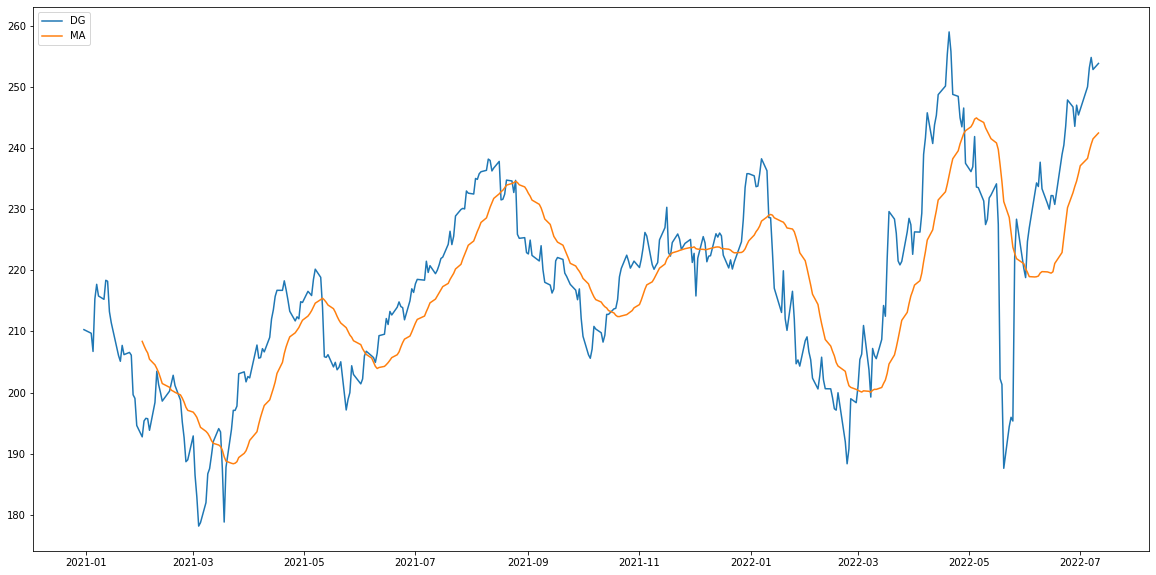

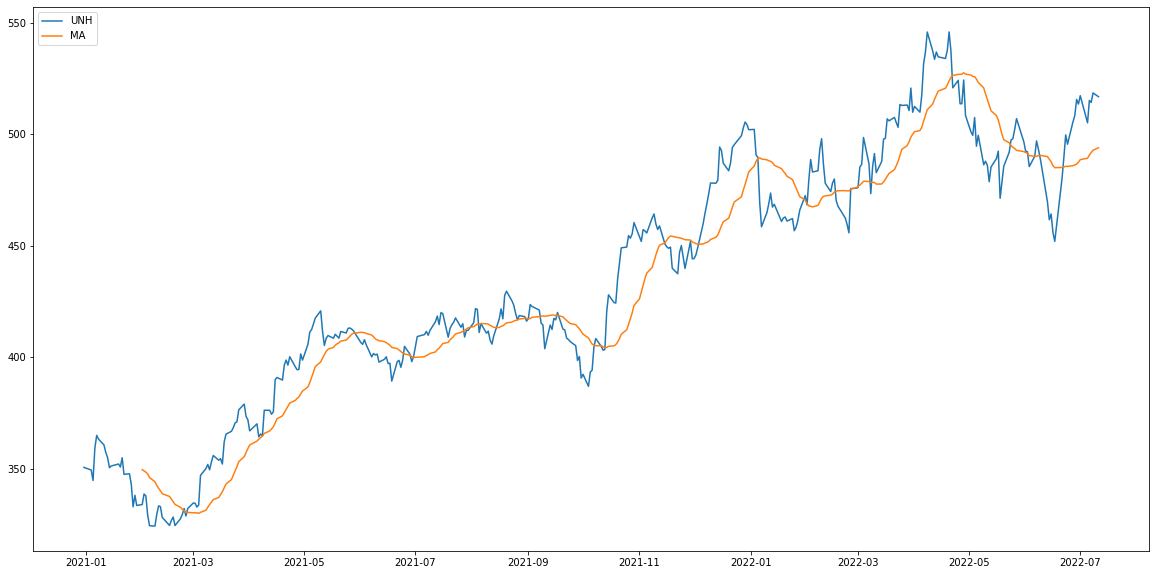

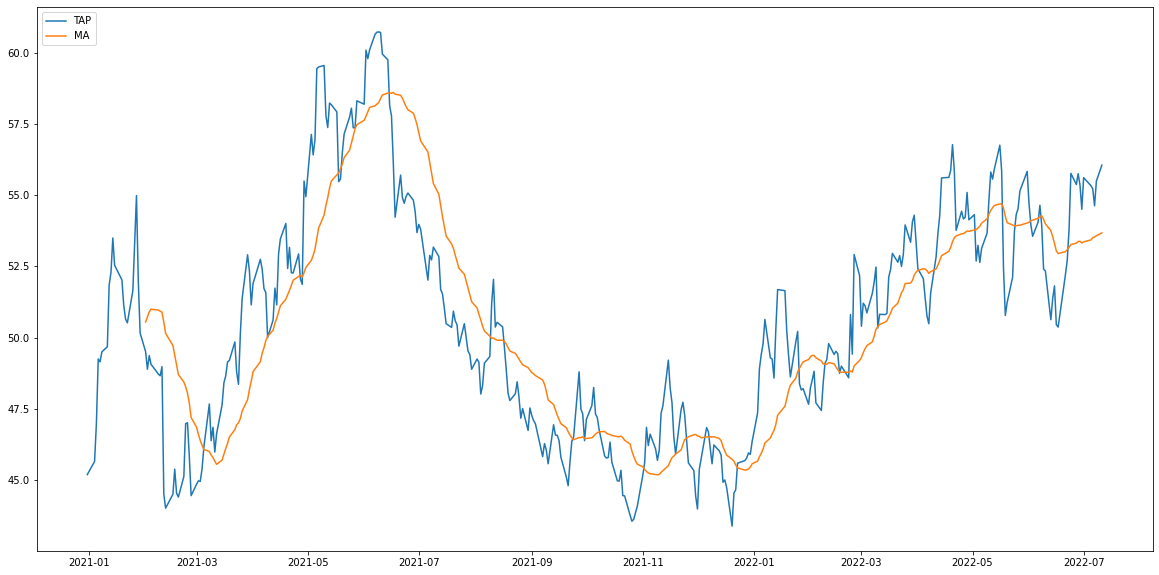

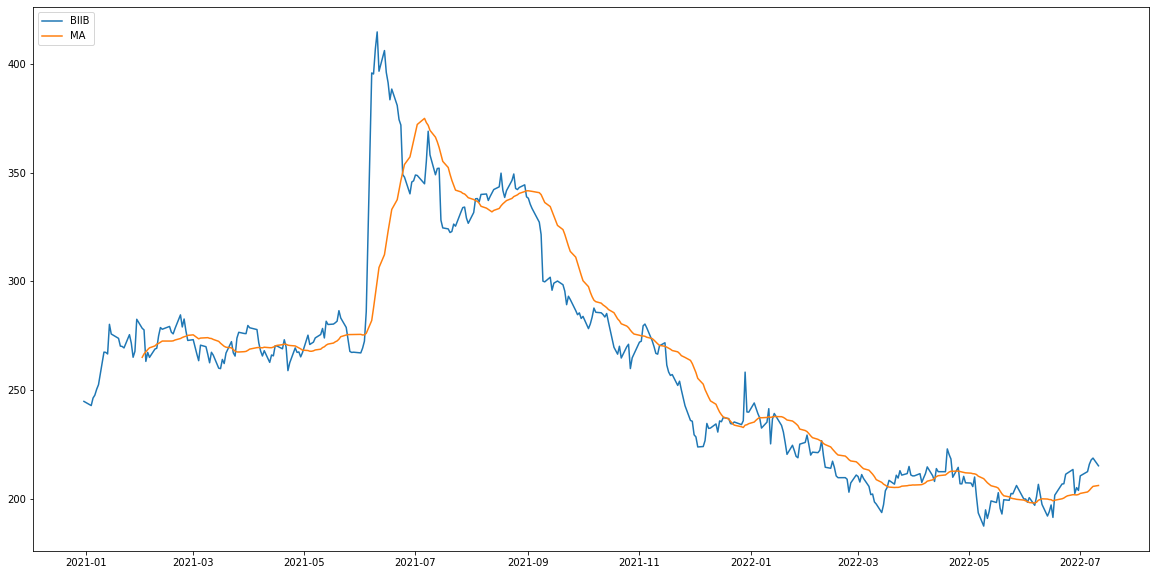

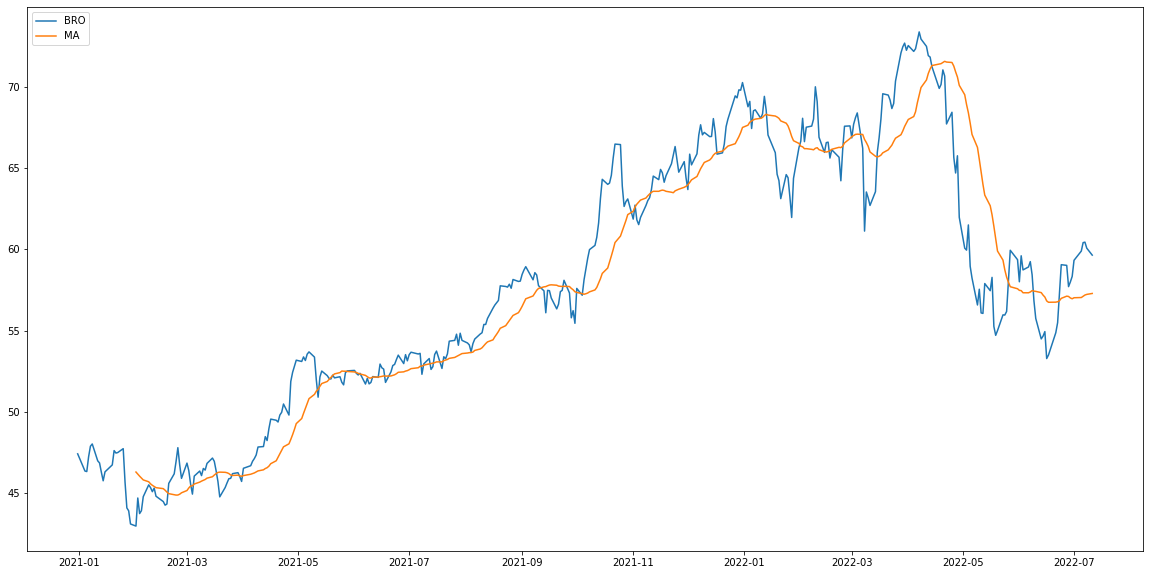

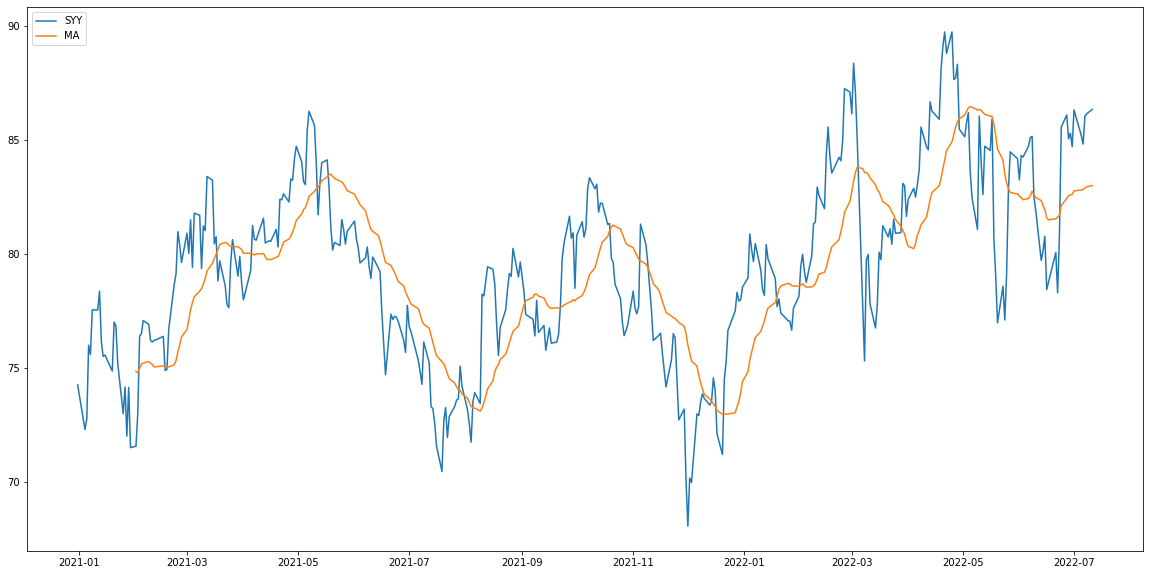

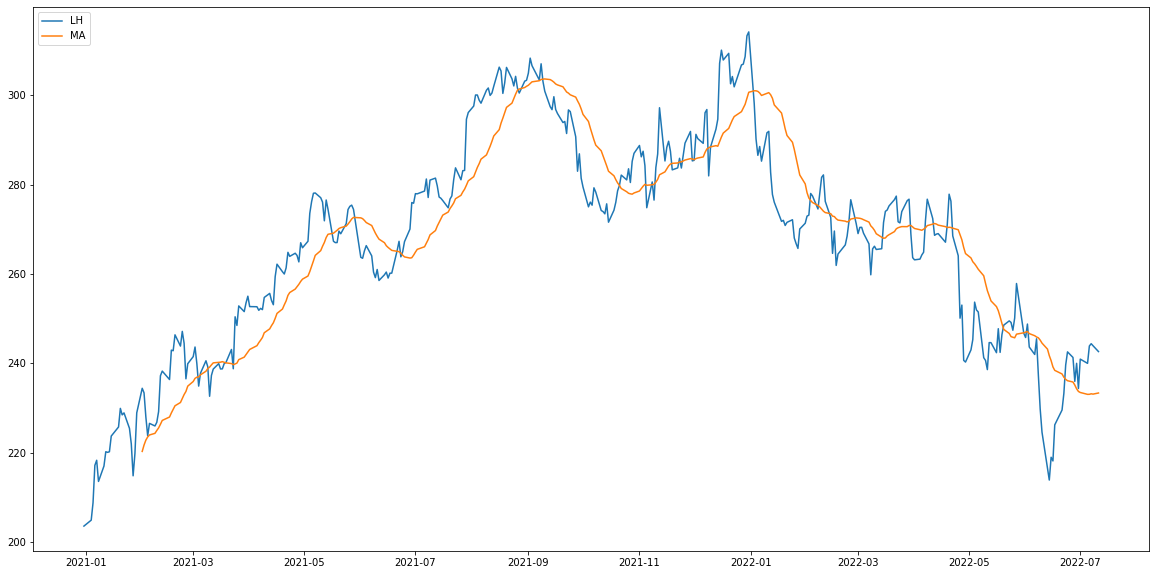

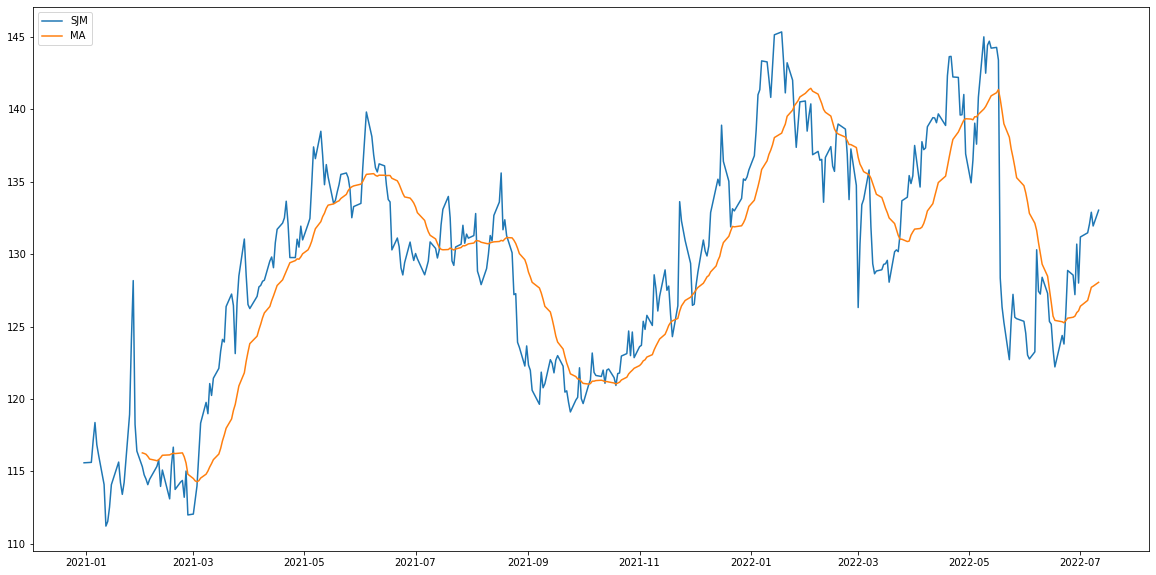

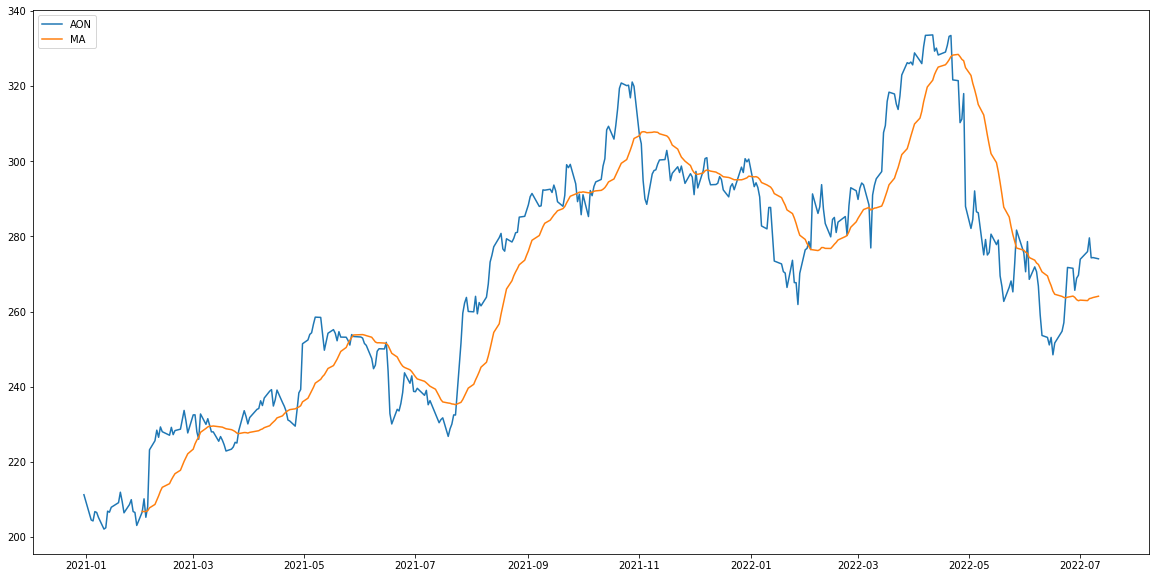

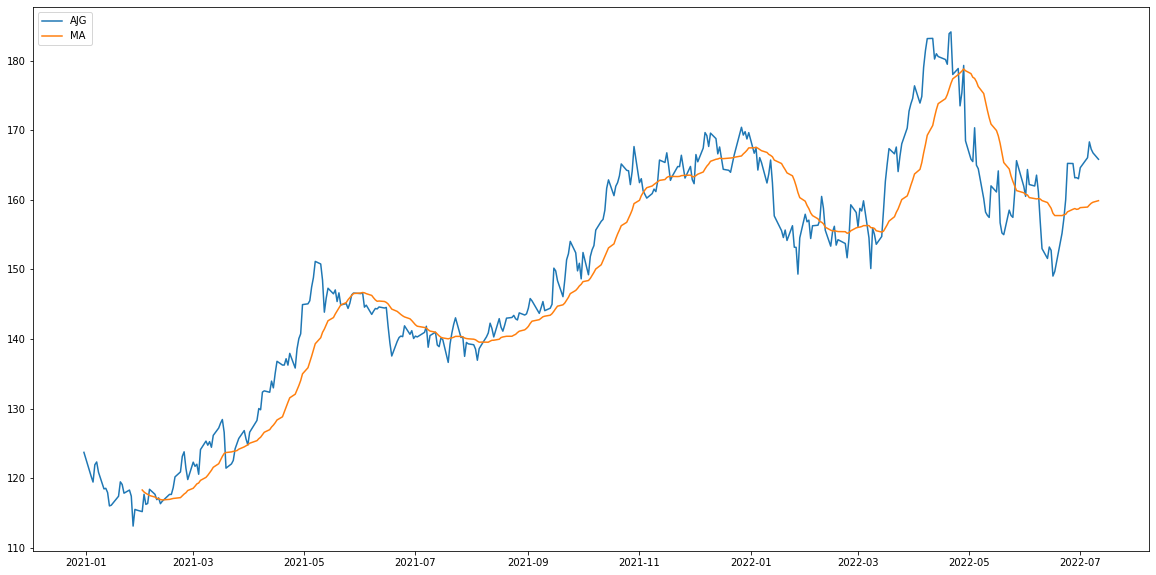

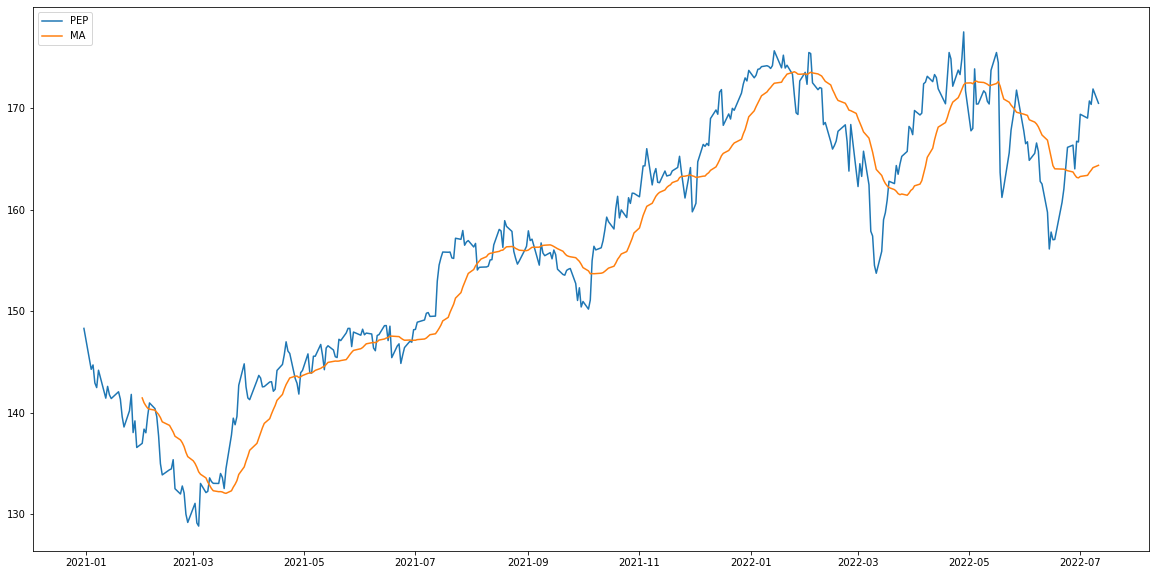

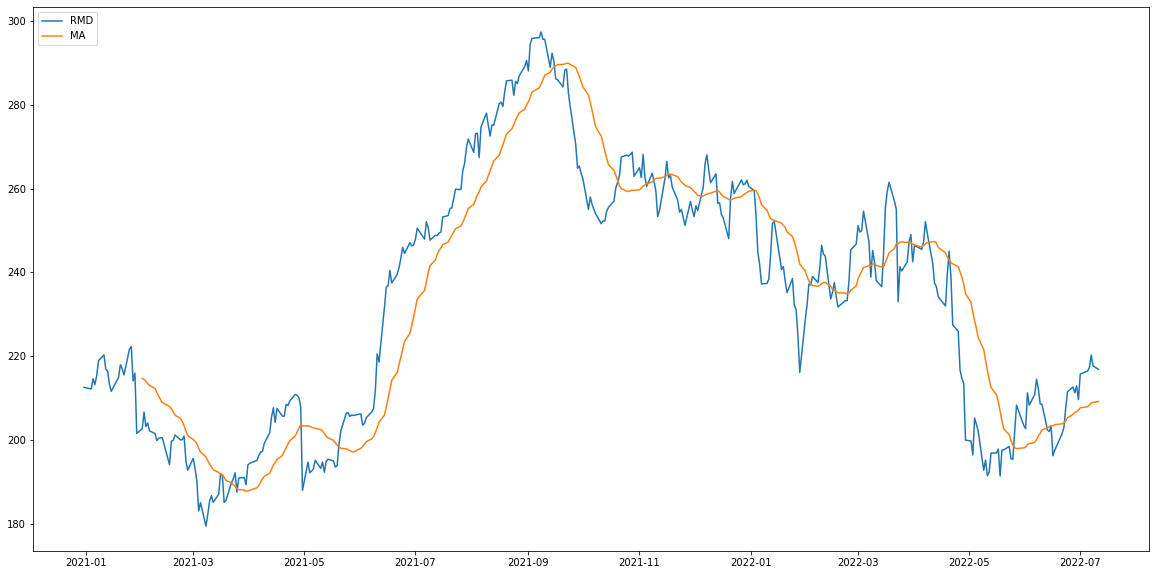

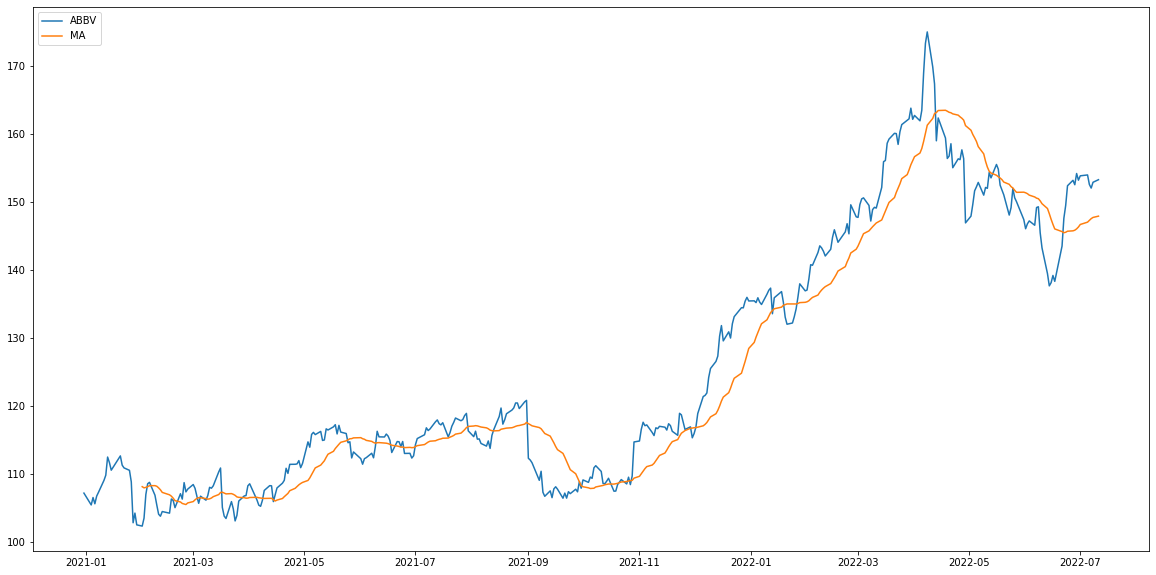

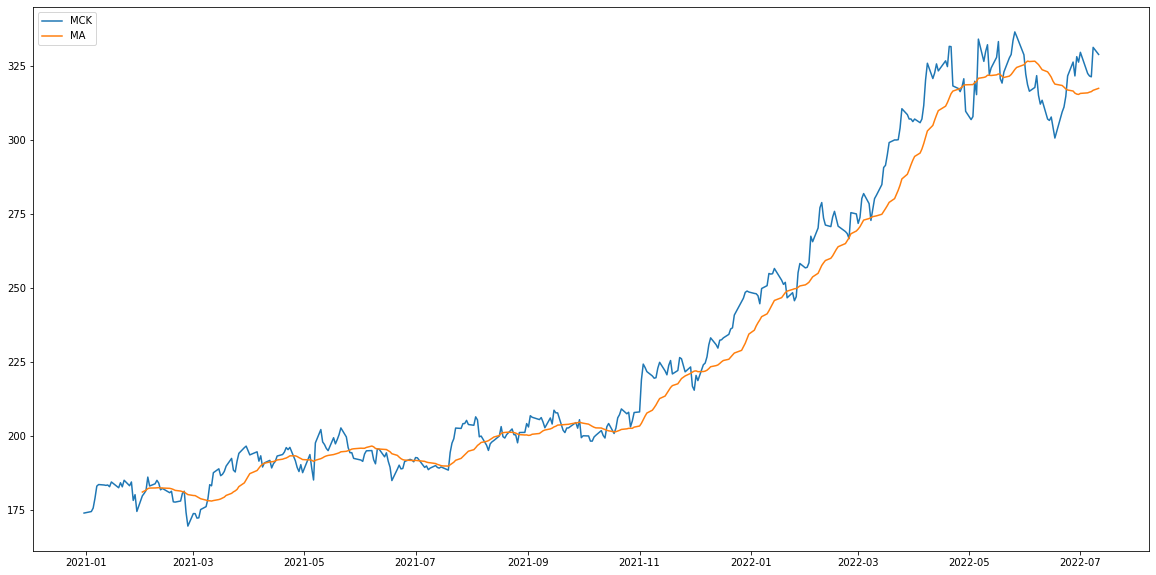

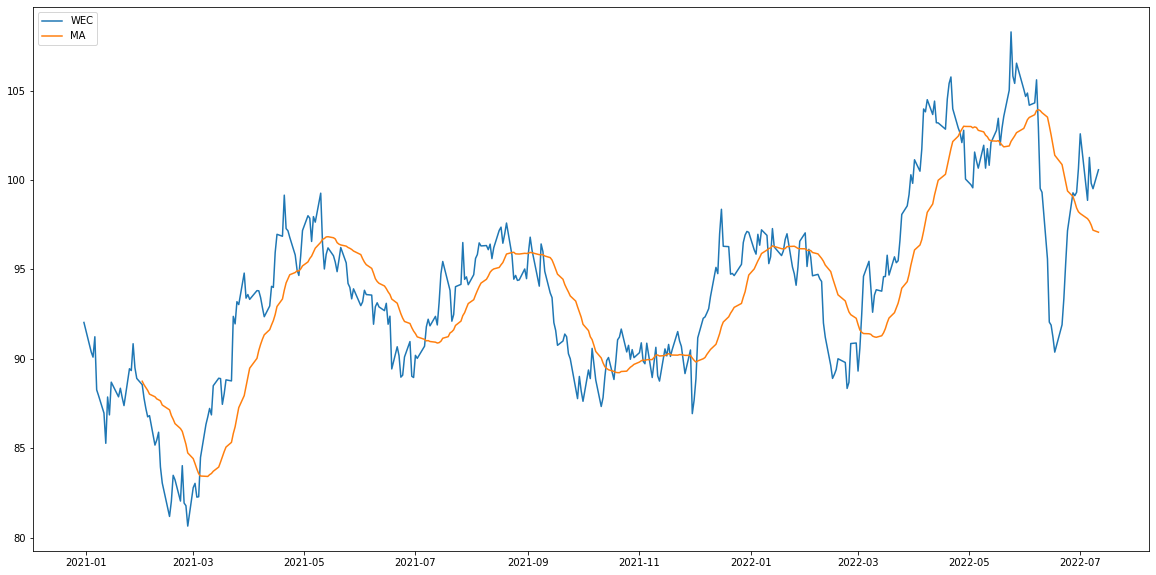

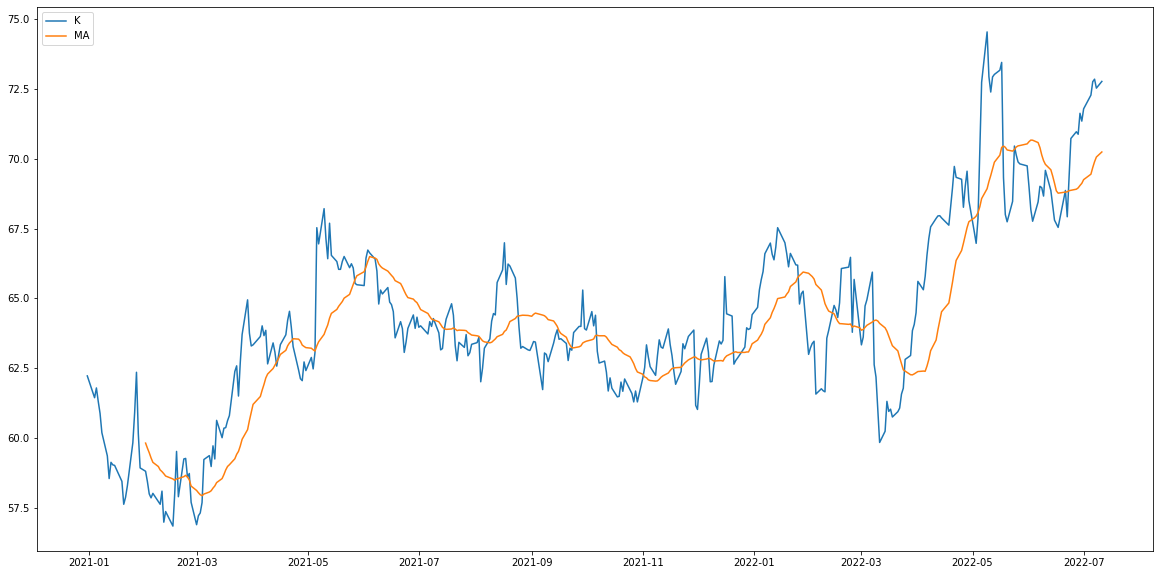

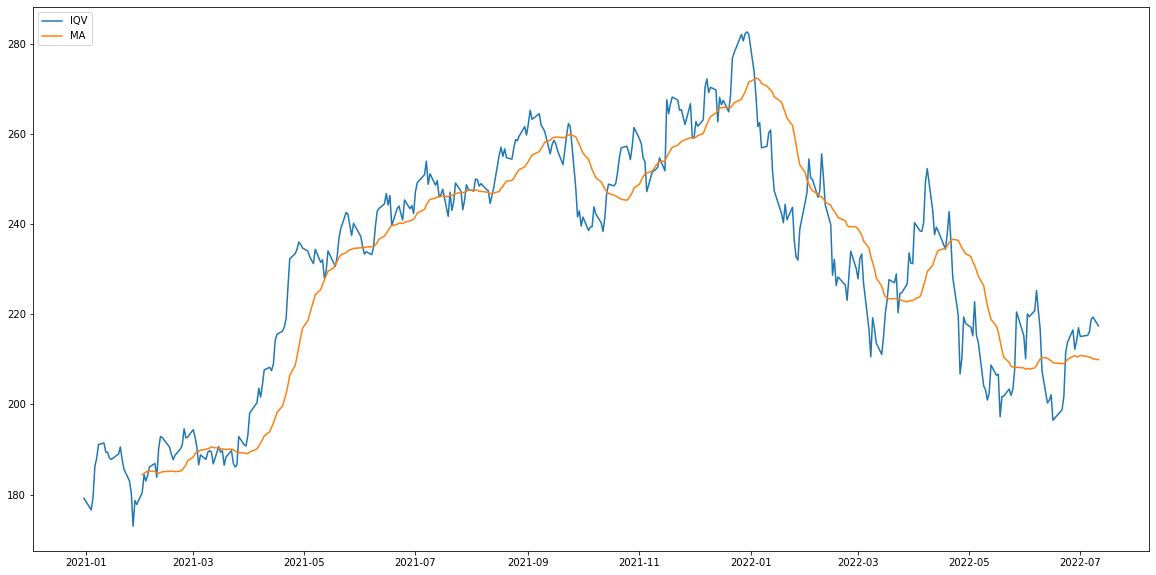

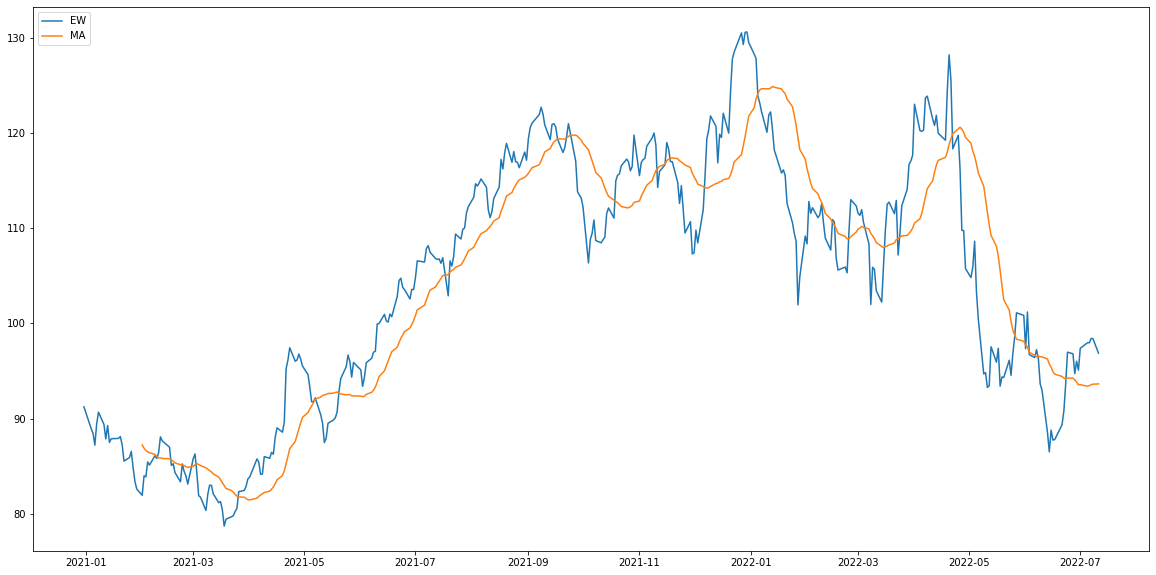

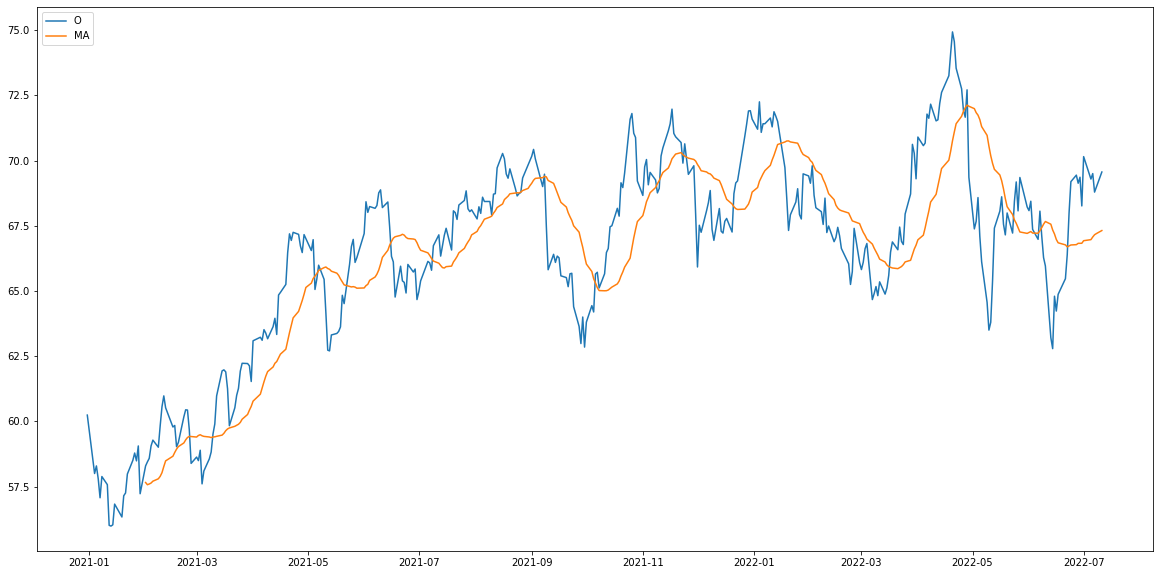

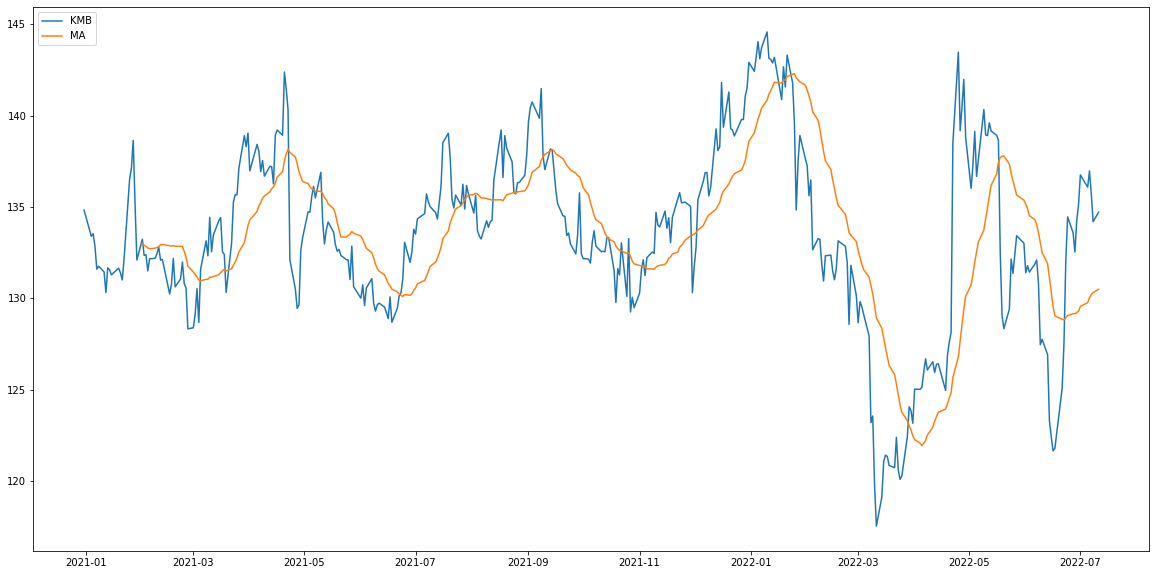

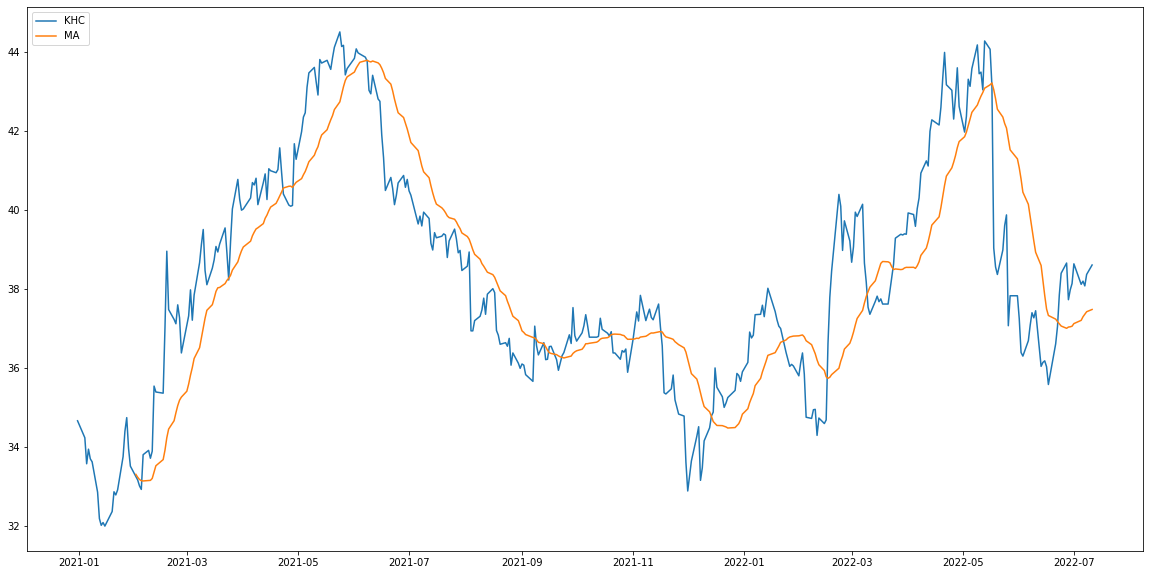

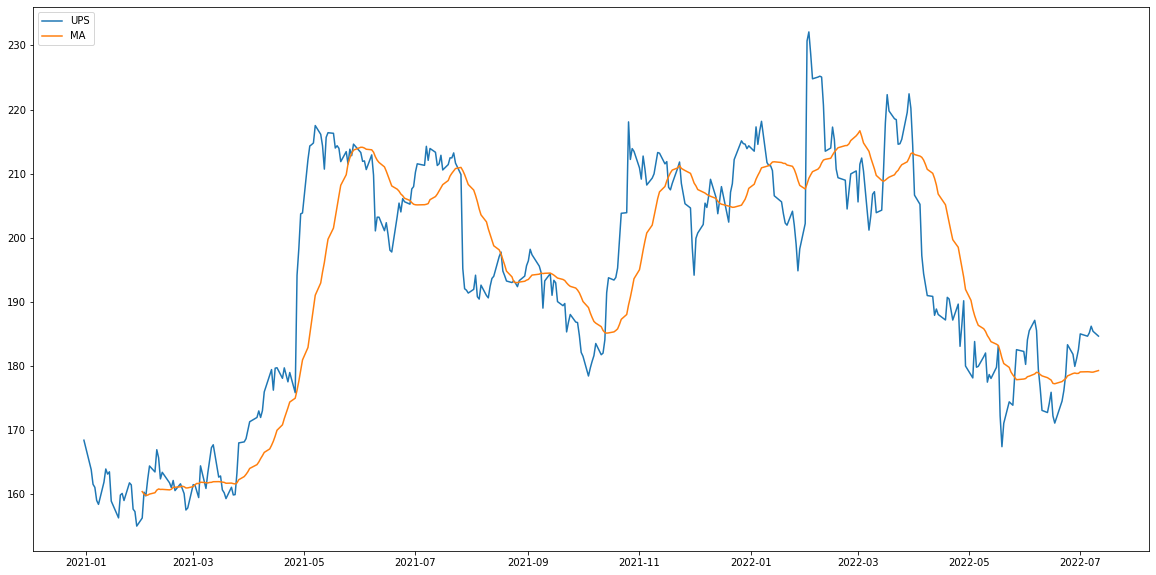

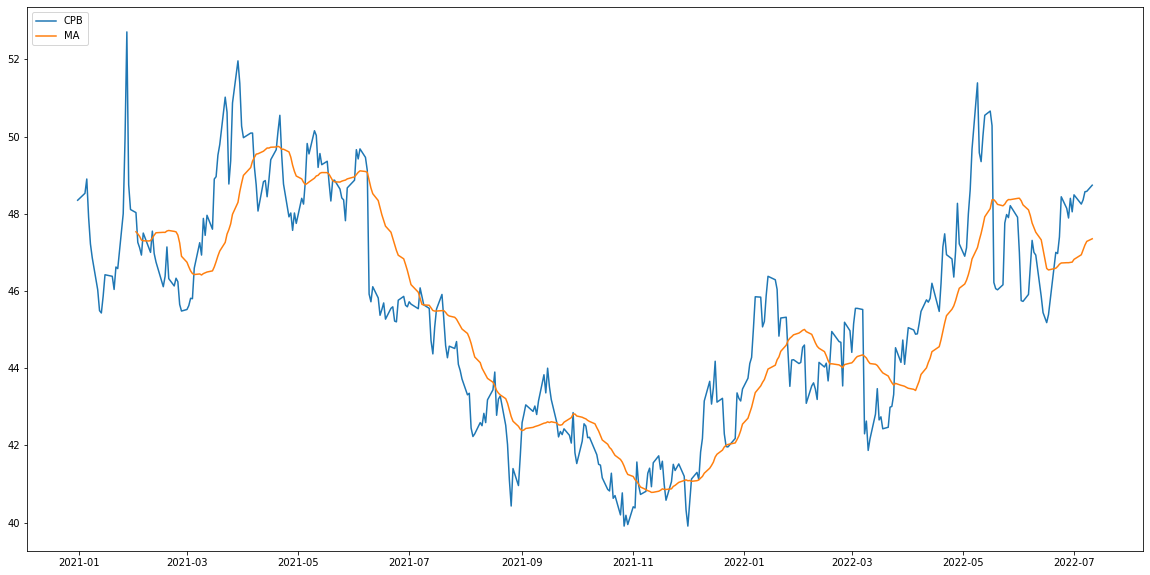

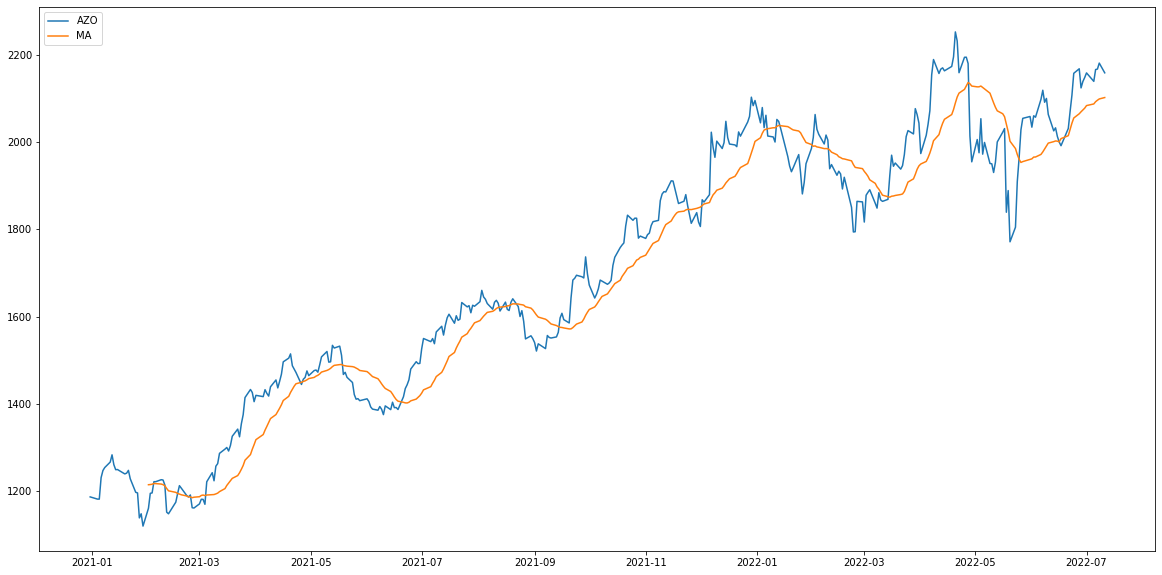

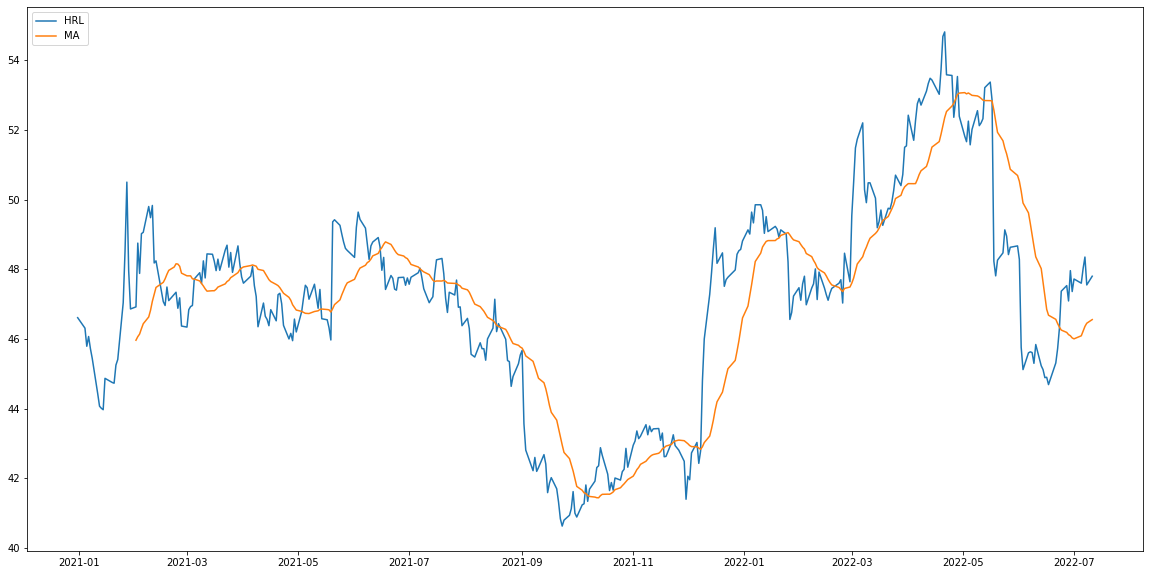

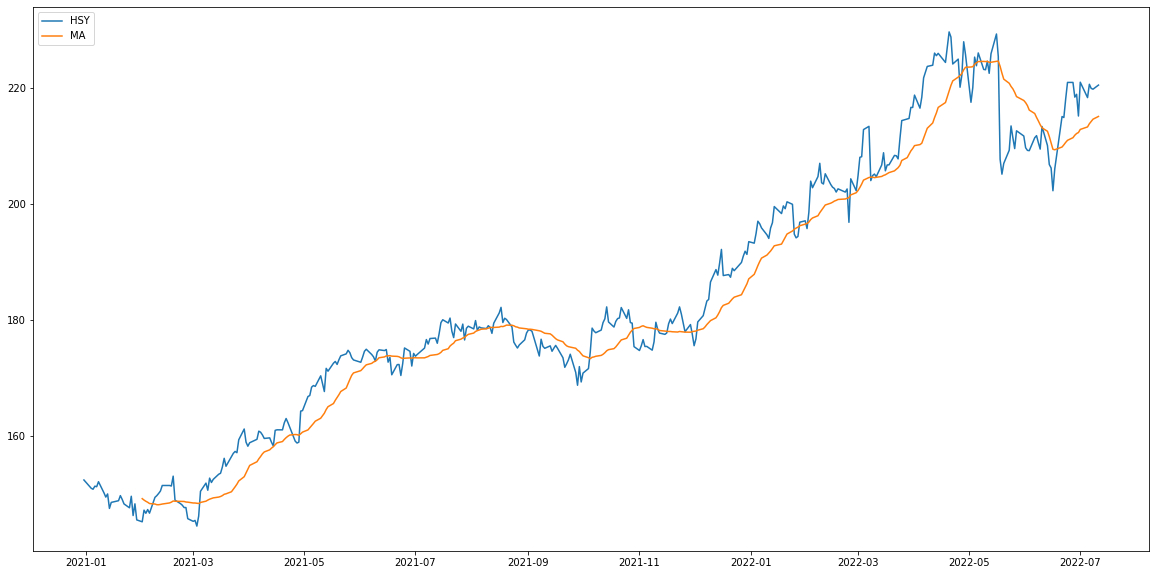

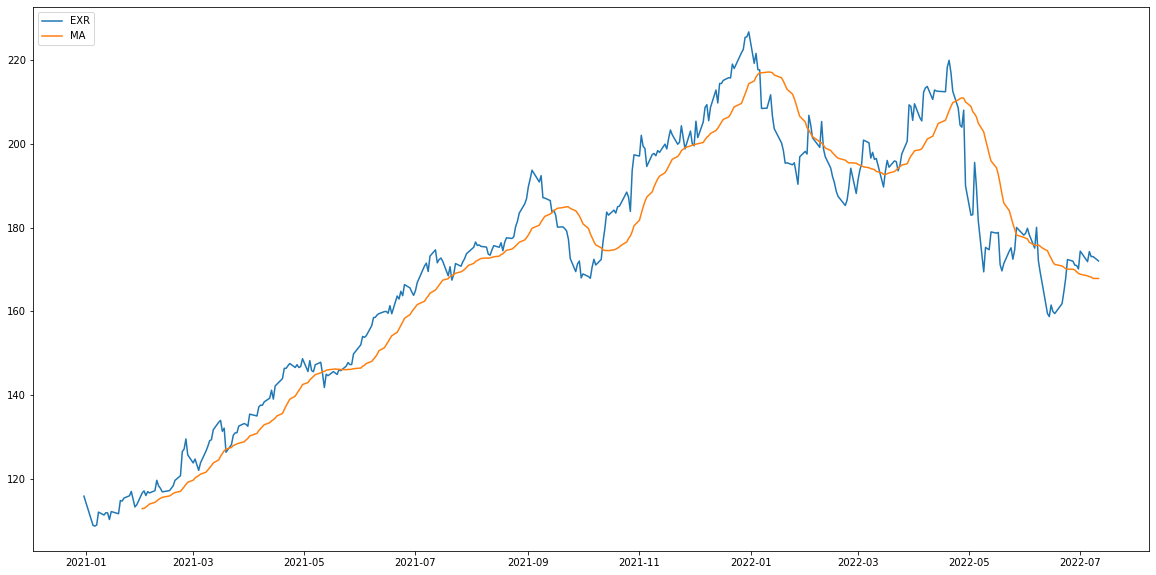

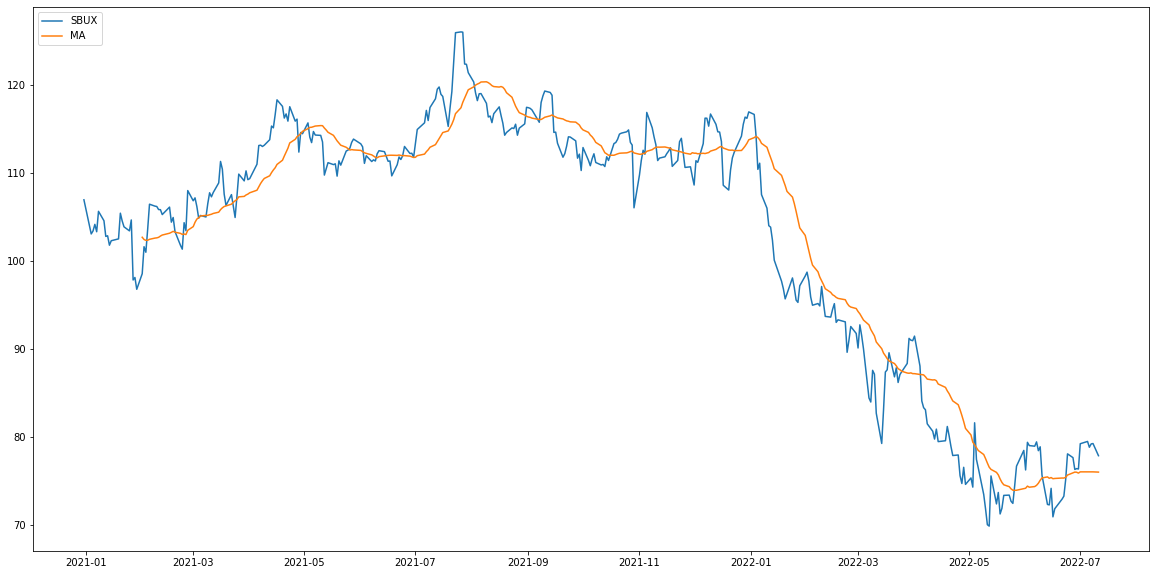

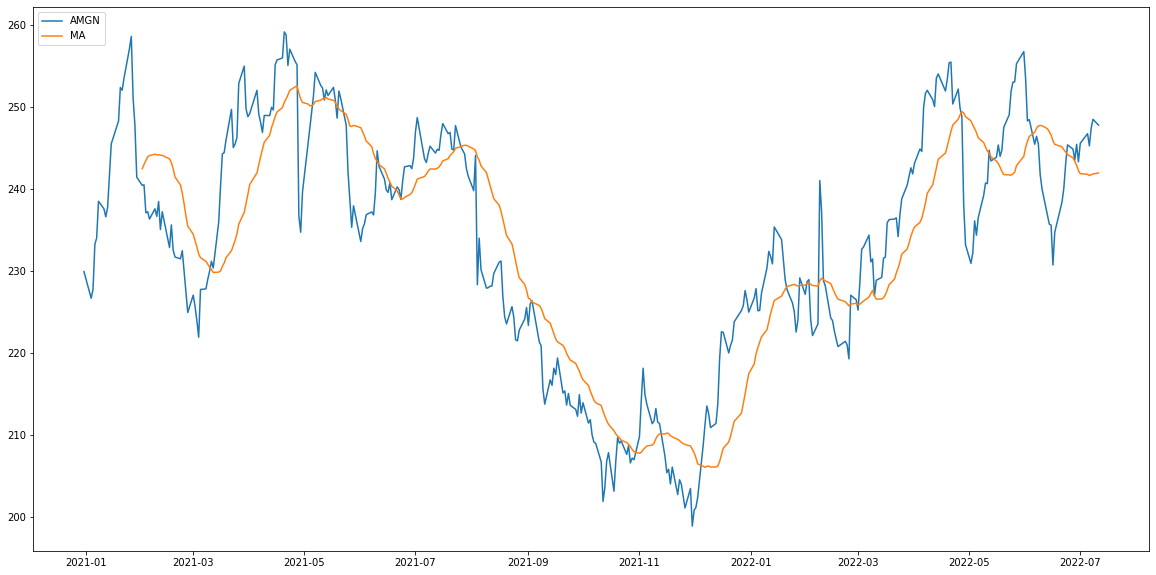

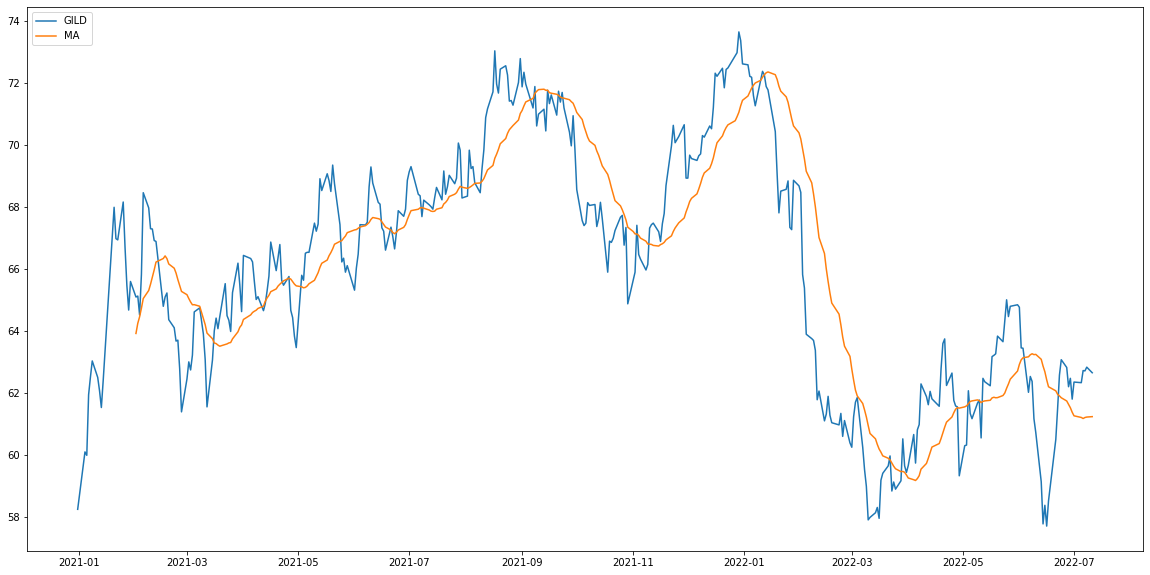

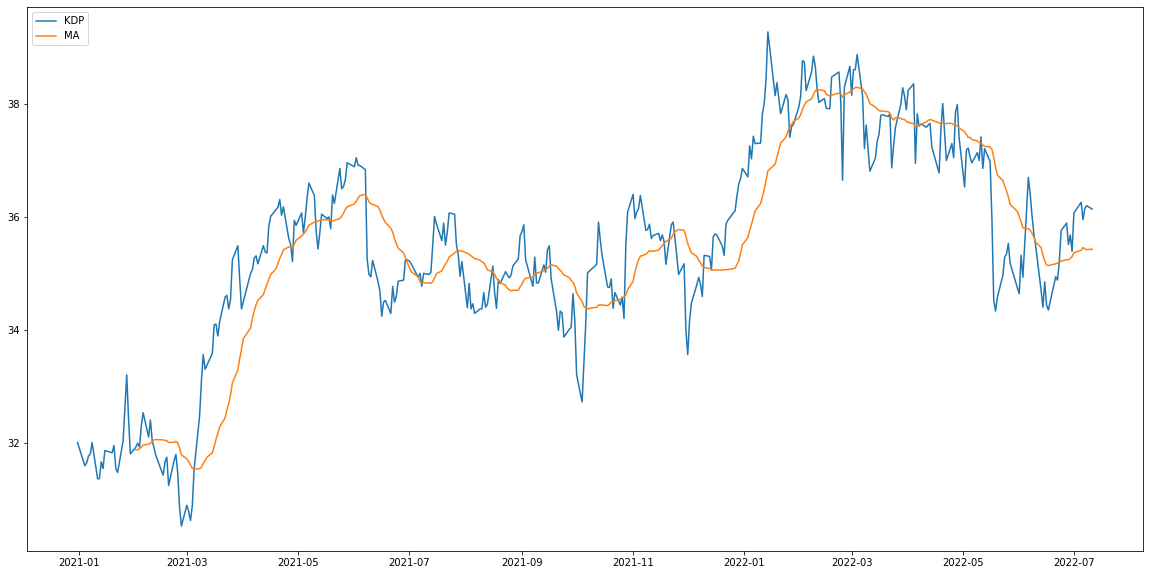

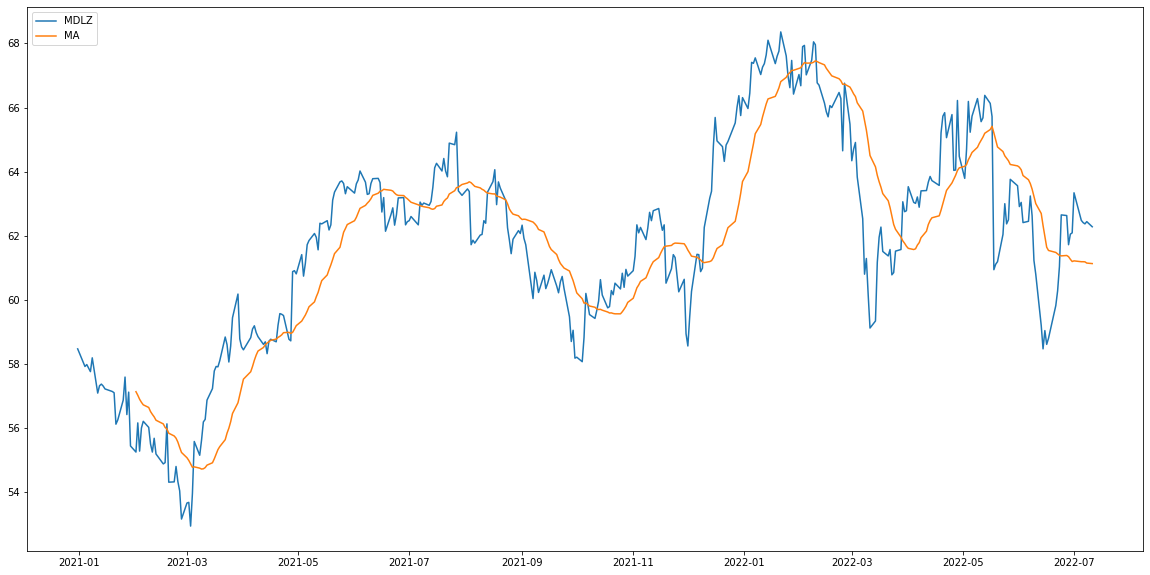

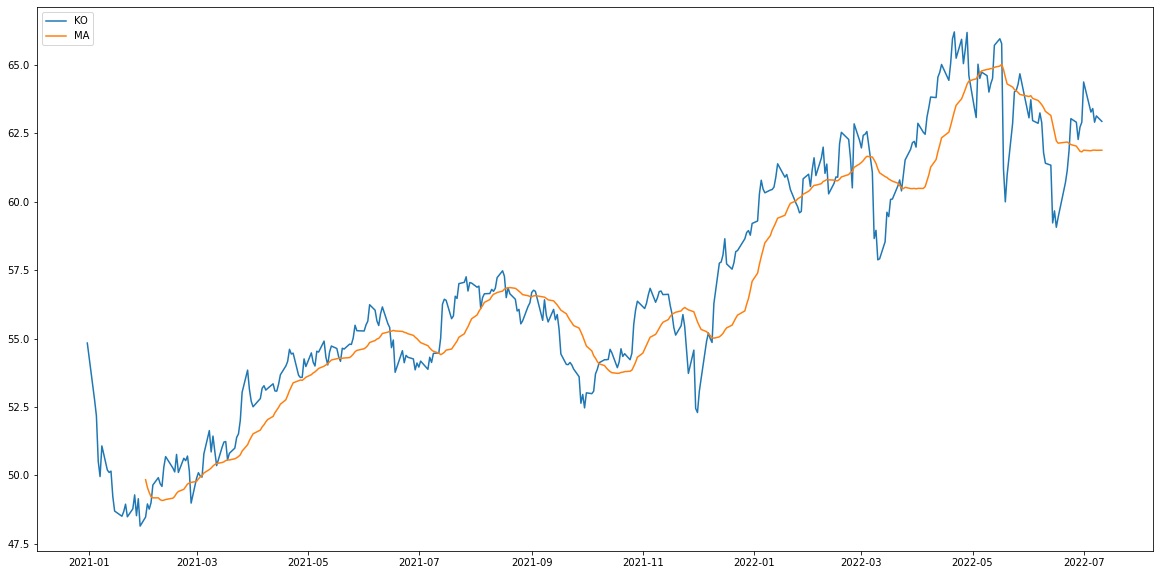

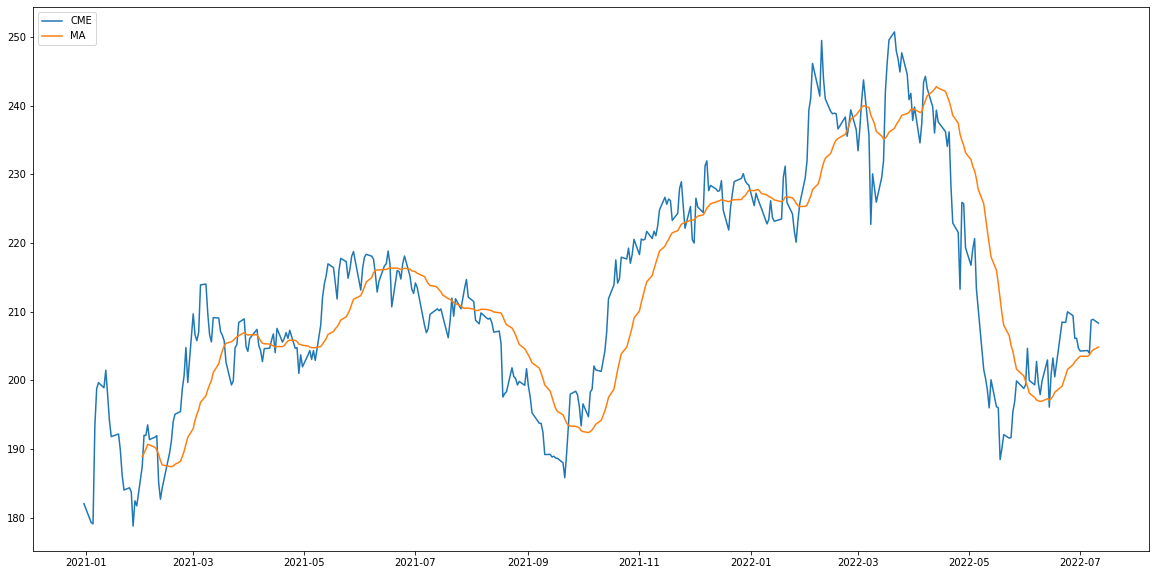

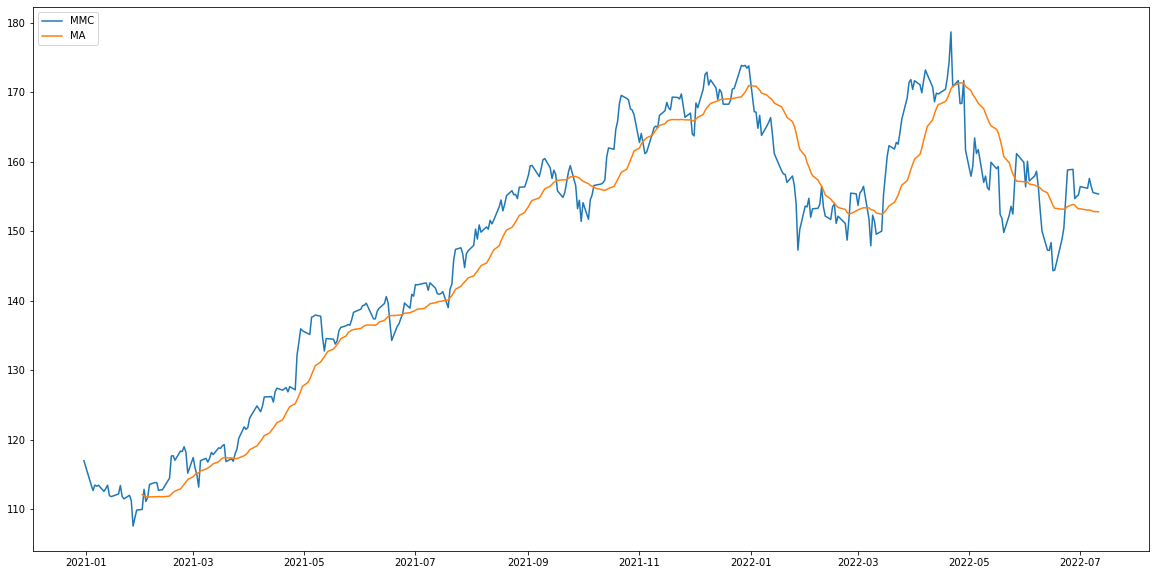

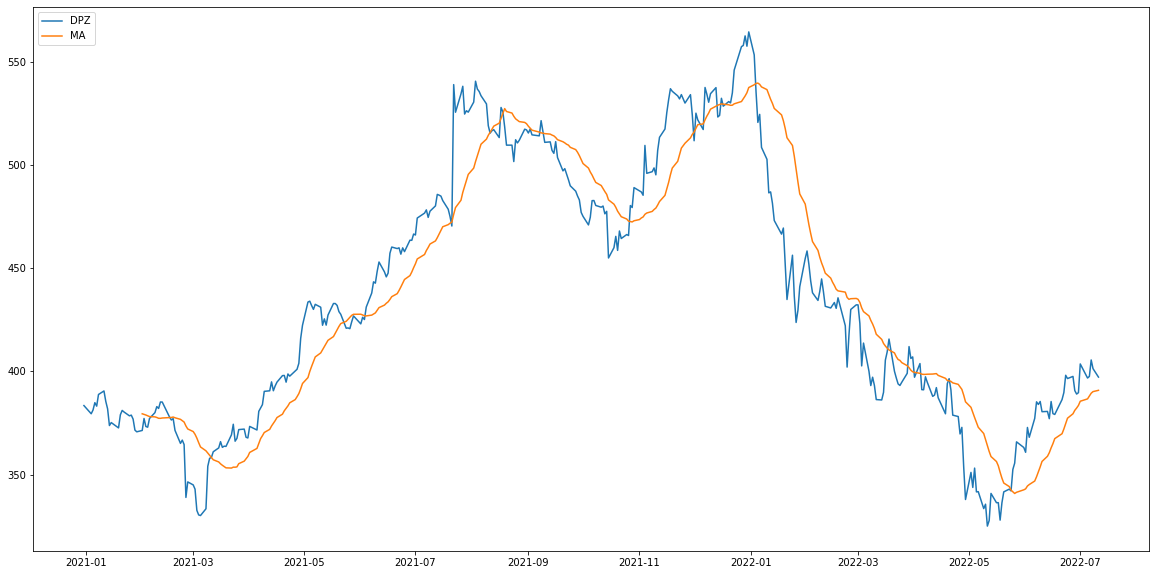

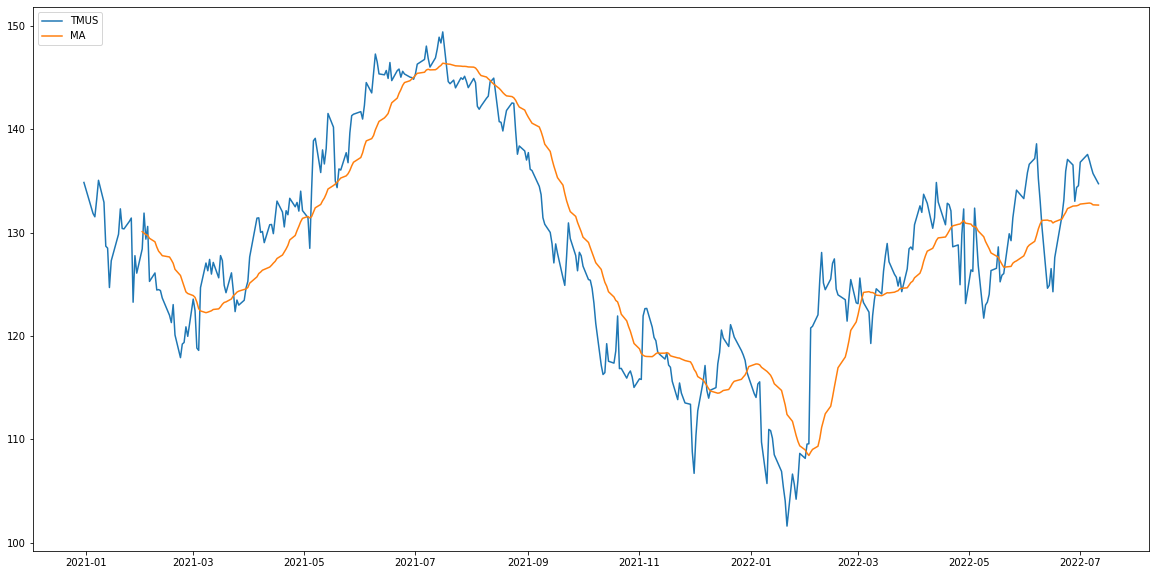

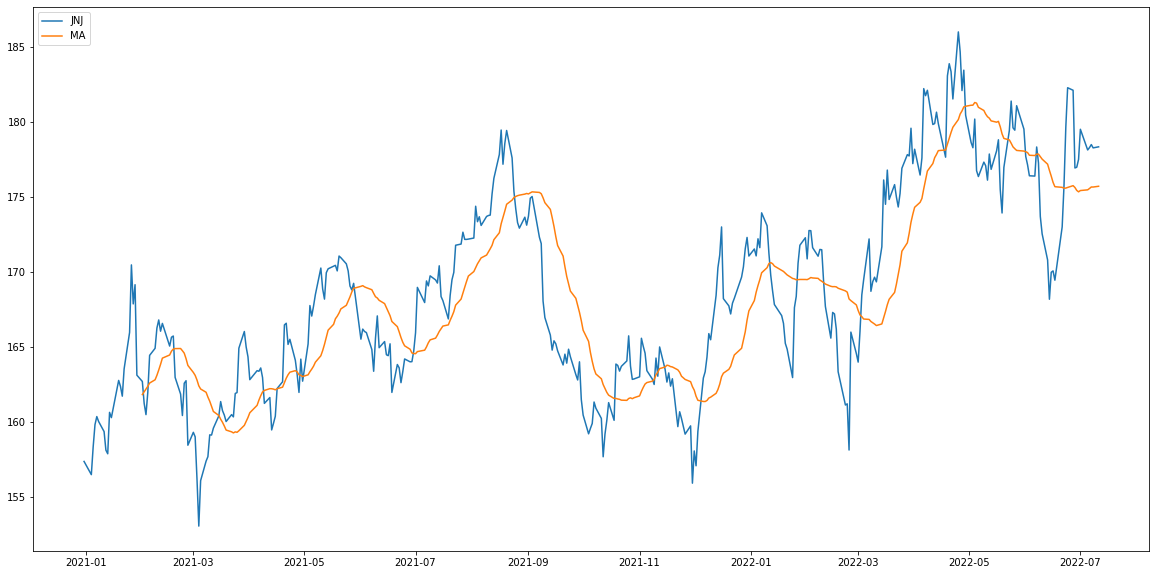

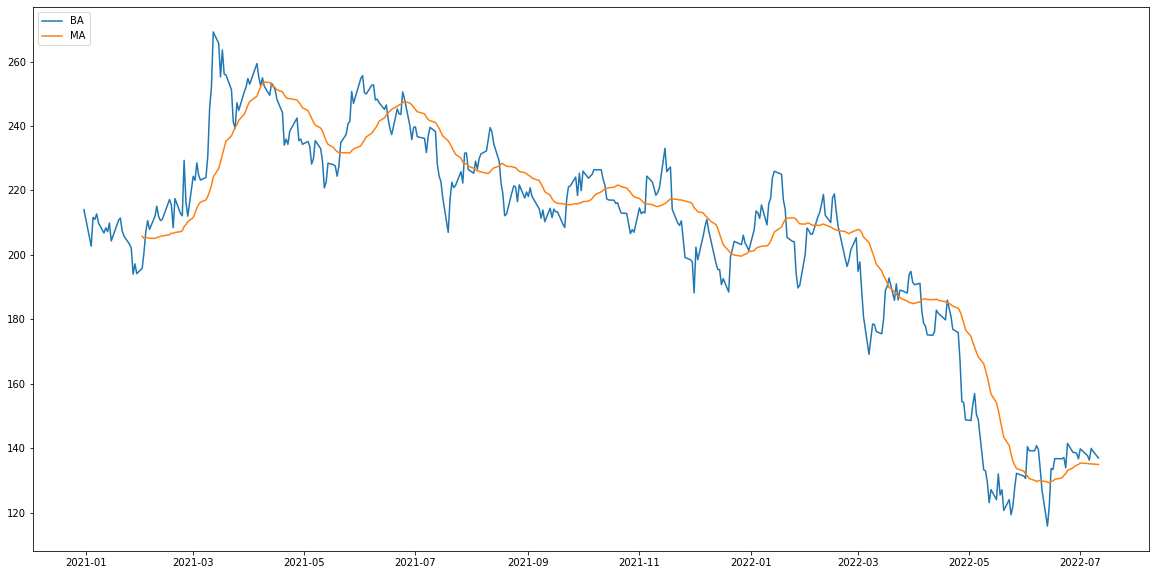

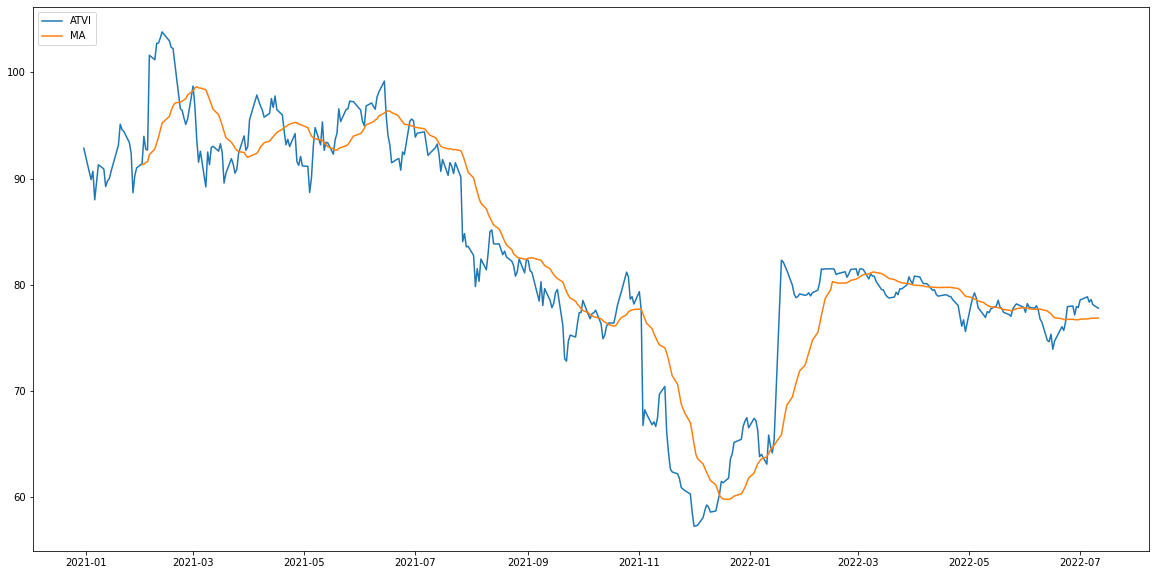

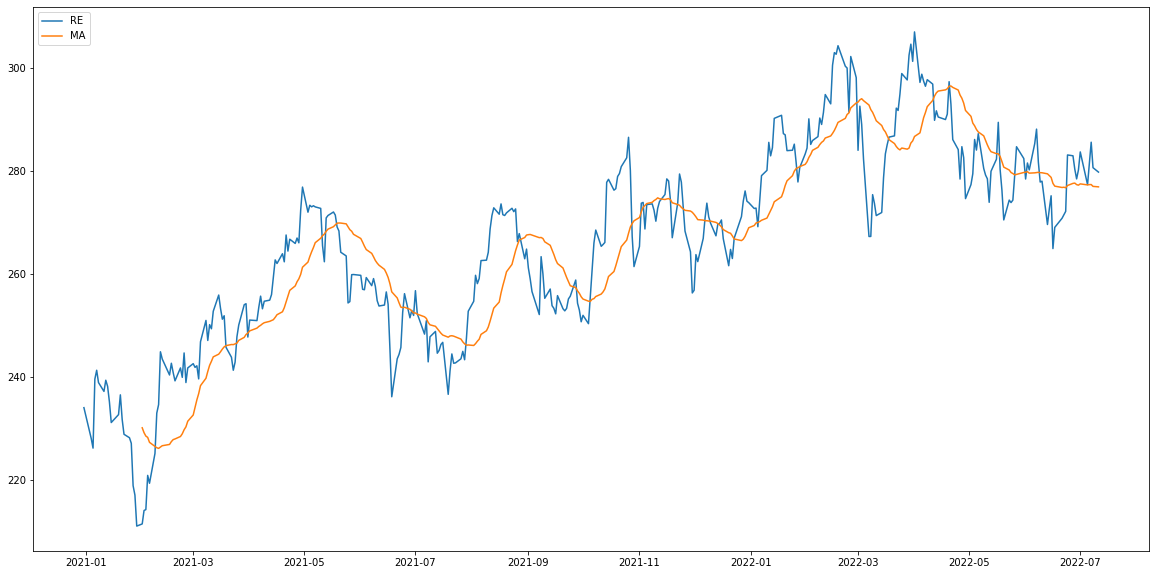

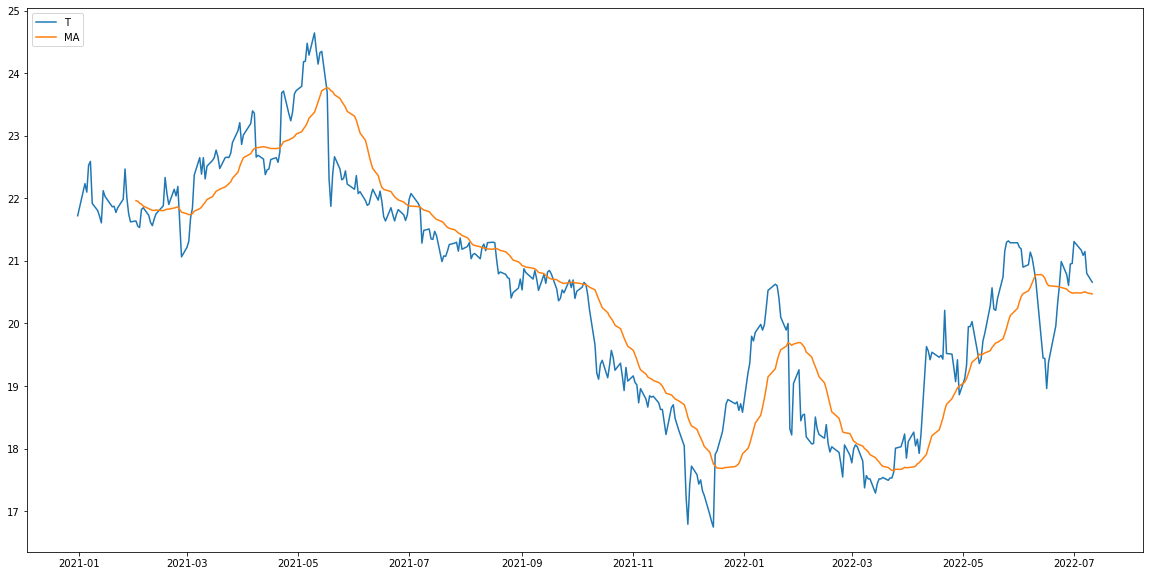

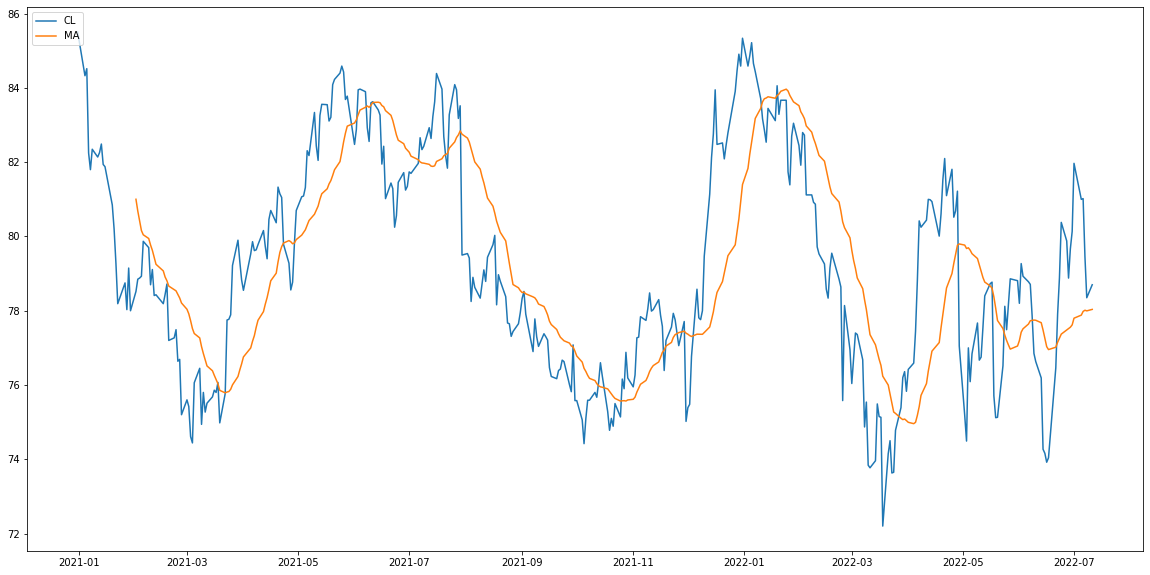

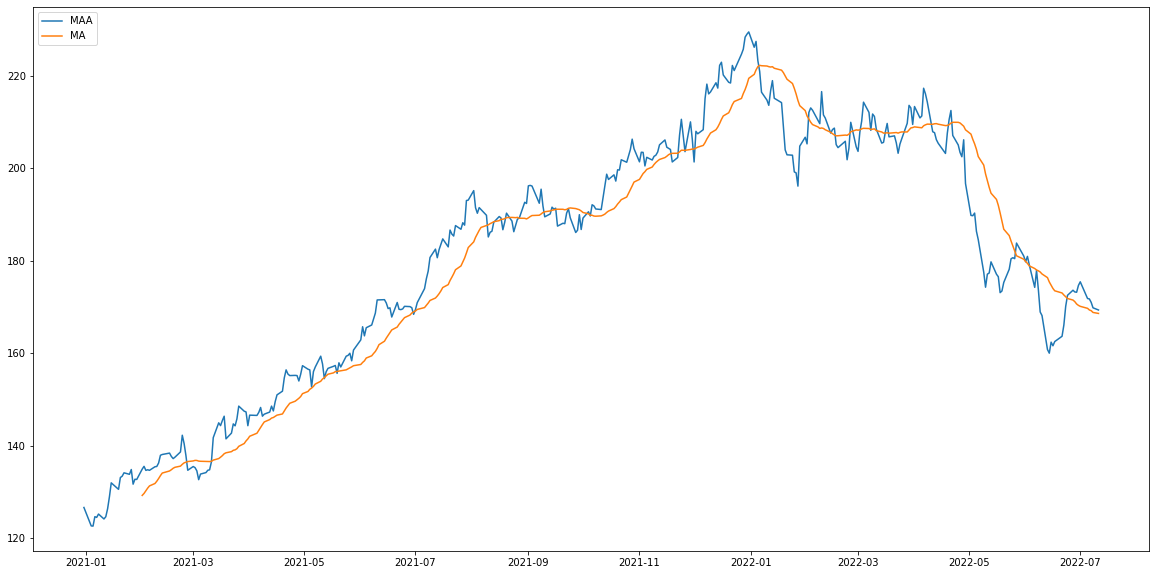

In [5]:
for quote in lead_comps:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(data[quote], label=quote);
    plt.plot(ma[quote], label = 'MA');
    #plt.title(get_company_name(quote))
    plt.legend(loc=2);